In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# ‚ë† ÏãúÏä§ÌÖúÏóê ÏÑ§ÏπòÎêú ÌïúÍ∏Ä Ìè∞Ìä∏ Ï§ë ÌïòÎÇò ÏÑ†ÌÉù (Ïòà: ÎßëÏùÄ Í≥†Îîï)
plt.rcParams['font.family'] = 'Malgun Gothic'  # ÏúàÎèÑÏö∞
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS
# plt.rcParams['font.family'] = 'NanumGothic'  # ÎÇòÎàîÌè∞Ìä∏ ÏÑ§Ïπò Ïãú

# ‚ë° ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

# ÌòºÏû°ÎèÑ ÌååÏùº Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [16]:
import pandas as pd

# ÌååÏùº Í≤ΩÎ°ú (Î°úÏª¨Ïóê ÎßûÍ≤å ÏàòÏ†ï)
file_path = "data/ÌòºÏû°ÎèÑ_2022_ÌÜµÌï©.csv"

# Ïù∏ÏΩîÎî© Ï≤òÎ¶¨ Ìè¨Ìï®Ìïú Î∂àÎü¨Ïò§Í∏∞
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp949')

# datetime Ïª¨ÎüºÏù¥ ÏûàÎã§Î©¥ Î≥ÄÌôò
df['datetime'] = pd.to_datetime(df['datetime'])

# hour Ïª¨ÎüºÏù¥ ÏóÜÎã§Î©¥ ÏÉùÏÑ±
if 'hour' not in df.columns:
    df['hour'] = df['datetime'].dt.hour

# ÎØ∏Î¶¨Î≥¥Í∏∞
df.head()

tm  line  station_number name direction  stn   TMP     wd  WSD  \
0  2022010100     1             150  ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419  -9.4   61.0  3.5   
1  2022010101     1             150  ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419  -9.4   39.4  2.0   
2  2022010105     1             150  ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419  -9.7  350.9  0.9   
3  2022010106     1             150  ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419  -9.4  139.6  0.5   
4  2022010107     1             150  ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -10.1  173.6  2.7   

   rn_day  PCP   REH    si  ta_chi  congestion  year  month  day  hour  \
0     0.0  0.0  34.0 -99.0   -12.8           0  2022      1    1     0   
1     0.0  0.0  35.8 -99.0   -10.4           0  2022      1    1     1   
2     0.0  0.0  44.5 -99.0   -10.8           2  2022      1    1     5   
3     0.0  0.0  43.4 -99.0   -11.0           5  2022      1    1     6   
4     0.0  0.0  49.2 -99.0   -10.9           4  2022      1    1     7   

             datetime  
0 2022-01-01 00:00:00  
1 2022-01-01 00:01:00  
2 2022-01-01 00:05:00  
3 2022-01-01 00:06:00  
4 2022-01-01 00:07:00

In [17]:
df_original = df.copy() # Î≥¥Í∞Ñ Ï†Ñ Î≥µÏÇ¨

In [44]:
df=df_original.copy()

### TMP

In [45]:
# TMPÍ∞Ä Í≤∞Ï∏°ÏπòÏù∏ Ìñâ ÌïÑÌÑ∞ÎßÅ
tmp_na_df = df[df['TMP'].isna()].copy()

# ÎÇ†ÏßúÎßå Îî∞Î°ú Ïª¨ÎüºÏúºÎ°ú Î∂ÑÎ¶¨
tmp_na_df['date'] = tmp_na_df['datetime'].dt.date

# ÎÇ†Ïßú Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
tmp_na_df = tmp_na_df.sort_values('datetime')

# Í≤∞Í≥º ÌôïÏù∏
tmp_na_df

tm  line  station_number   name direction  stn  TMP    wd  \
65633    2022010611     1            1907     Í∞ÄÎä•        ÏÉÅÏÑ†  431  NaN -99.0   
66263    2022010611     1            1907     Í∞ÄÎä•        ÌïòÏÑ†  431  NaN -99.0   
308912   2022011105     5            2565   ÌïòÎÇ®ÏãúÏ≤≠        ÏÉÅÏÑ†  444  NaN -99.0   
309542   2022011105     5            2565   ÌïòÎÇ®ÏãúÏ≤≠        ÌïòÏÑ†  444  NaN -99.0   
310172   2022011105     5            2566  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞        ÏÉÅÏÑ†  444  NaN -99.0   
...             ...   ...             ...    ...       ...  ...  ...   ...   
5038185  2022120417     1            1911     ÎçïÏ†ï        ÌïòÏÑ†  372  NaN -99.0   
5038196  2022120507     1            1911     ÎçïÏ†ï        ÌïòÏÑ†  372  NaN -99.0   
5037608  2022120507     1            1911     ÎçïÏ†ï        ÏÉÅÏÑ†  372  NaN -99.0   
5037611  2022120510     1            1911     ÎçïÏ†ï        ÏÉÅÏÑ†  372  NaN -99.0   
5038199  2022120510     1            1911     ÎçïÏ†ï        ÌïòÏÑ†  372  NaN -99.0   

         WSD  rn_day  ...   REH     si  ta_chi  congestion  year  month  day  \
65633    NaN   -99.0  ...   NaN   1.34    -0.1          13  2022      1    6   
66263    NaN   -99.0  ...   NaN   1.34    -0.1          23  2022      1    6   
308912   NaN   -99.0  ...   NaN -99.00    -9.2           9  2022      1   11   
309542   NaN   -99.0  ...   NaN -99.00    -9.2           0  2022      1   11   
310172   NaN   -99.0  ...   NaN -99.00    -9.2           5  2022      1   11   
...      ...     ...  ...   ...    ...     ...         ...   ...    ...  ...   
5038185  NaN   -99.0  ...   NaN   0.16    -2.6          22  2022     12    4   
5038196  NaN   -99.0  ...   NaN -99.00    -8.6          21  2022     12    5   
5037608  NaN   -99.0  ...   NaN -99.00    -8.6           7  2022     12    5   
5037611  NaN   -99.0  ...  36.8   1.06    -4.8          10  2022     12    5   
5038199  NaN   -99.0  ...  36.8   1.06    -4.8          20  2022     12    5   

         hour            datetime        date  
65633      11 2022-01-06 01:01:00  2022-01-06  
66263      11 2022-01-06 01:01:00  2022-01-06  
308912      5 2022-01-11 00:05:00  2022-01-11  
309542      5 2022-01-11 00:05:00  2022-01-11  
310172      5 2022-01-11 00:05:00  2022-01-11  
...       ...                 ...         ...  
5038185    17 2022-12-04 01:07:00  2022-12-04  
5038196     7 2022-12-05 00:07:00  2022-12-05  
5037608     7 2022-12-05 00:07:00  2022-12-05  
5037611    10 2022-12-05 01:00:00  2022-12-05  
5038199    10 2022-12-05 01:00:00  2022-12-05  

[37922 rows x 21 columns]

In [47]:
def interpolate_TMP_partial_only(df):
    import numpy as np

    # Î≥µÏÇ¨ ÌõÑ Ï†ÑÏ≤òÎ¶¨
    df = df.copy()
    df['TMP'] = pd.to_numeric(df['TMP'], errors='coerce')
    df['TMP'] = df['TMP'].replace(-99.0, np.nan)

    # datetime Ïù∏Îç±Ïä§ ÏÑ§Ï†ï
    df = df.set_index('datetime').sort_index()

    # Í≤∞Ï∏°Ïπò ÏãúÏ†êÎßå Ï∂îÏ∂ú
    na_times = df[df['TMP'].isna()].index
    updated = []

    for time in na_times:
        prev_time = time - pd.Timedelta(hours=1)
        next_time = time + pd.Timedelta(hours=1)

        if prev_time in df.index and next_time in df.index:
            prev_val = df.loc[prev_time, 'TMP']
            next_val = df.loc[next_time, 'TMP']

            if isinstance(prev_val, pd.Series):
                prev_val = prev_val.values[0]
            if isinstance(next_val, pd.Series):
                next_val = next_val.values[0]

            if pd.notna(prev_val) and pd.notna(next_val):
                interp_val = (prev_val + next_val) / 2
                df.at[time, 'TMP'] = interp_val  # <- Ïò§ÏßÅ Ïù¥ Ï°∞Í±¥Îßå Î≥¥Í∞Ñ

    return df.reset_index()

In [79]:
df_tmp_cleaned = interpolate_TMP_partial_only(df)

In [80]:
df_tmp_cleaned

datetime          tm  line  station_number    name  \
0       2022-01-01 00:00:00  2022010100     1             150     ÏÑúÏö∏Ïó≠   
1       2022-01-01 00:00:00  2022010100     6            2642      ÏõîÍ≥°   
2       2022-01-01 00:00:00  2022010100     1            1821      Ïò®Ïàò   
3       2022-01-01 00:00:00  2022010100     6            2643     ÏÉÅÏõîÍ≥°   
4       2022-01-01 00:00:00  2022010100     6            2643     ÏÉÅÏõîÍ≥°   
...                     ...         ...   ...             ...     ...   
5396195 2022-12-31 02:03:00  2022123123     7            2742    Ïû•ÏäπÎ∞∞Í∏∞   
5396196 2022-12-31 02:03:00  2022123123     3             328      Ïû†Ïõê   
5396197 2022-12-31 02:03:00  2022123123     3             329   Í≥†ÏÜçÌÑ∞ÎØ∏ÎÑê   
5396198 2022-12-31 02:03:00  2022123123     4            1454  Ï†ïÎ∂ÄÍ≥ºÏ≤úÏ≤≠ÏÇ¨   
5396199 2022-12-31 02:03:00  2022123123     8            2828     ÎÇ®ÏúÑÎ°Ä   

        direction  stn  TMP     wd  WSD  rn_day  PCP   REH    si  ta_chi  \
0              ÏÉÅÏÑ†  419 -9.4   61.0  3.5     0.0  0.0  34.0 -99.0   -12.8   
1              ÌïòÏÑ†  408 -7.2  293.0  0.9     0.0  0.0  29.7 -99.0    -7.4   
2              ÏÉÅÏÑ†  423 -7.9  337.3  2.1     0.0  0.0  42.4 -99.0   -10.8   
3              ÏÉÅÏÑ†  408 -7.2  293.0  0.9     0.0  0.0  29.7 -99.0    -7.4   
4              ÌïòÏÑ†  408 -7.2  293.0  0.9     0.0  0.0  29.7 -99.0    -7.4   
...           ...  ...  ...    ...  ...     ...  ...   ...   ...     ...   
5396195        ÏÉÅÏÑ†  418  2.3  213.5  1.3     0.0  0.0  59.2 -99.0     0.1   
5396196        ÌïòÏÑ†  415 -1.6   14.6  0.4     0.0  0.0  71.2 -99.0    -0.7   
5396197        ÏÉÅÏÑ†  889 -3.0  247.6  0.3     0.0  0.0  95.5 -99.0    -0.1   
5396198        ÏÉÅÏÑ†  590 -2.2  173.8  1.9     0.0  0.0  80.8 -99.0    -1.4   
5396199        ÌïòÏÑ†  572 -2.7  114.5  0.2     0.0  0.0  74.3 -99.0    -3.7   

         congestion  year  month  day  hour  
0                 0  2022      1    1     0  
1                 0  2022      1    1     0  
2                 0  2022      1    1     0  
3                 0  2022      1    1     0  
4                 0  2022      1    1     0  
...             ...   ...    ...  ...   ...  
5396195          10  2022     12   31    23  
5396196          19  2022     12   31    23  
5396197          14  2022     12   31    23  
5396198          17  2022     12   31    23  
5396199          18  2022     12   31    23  

[5396200 rows x 20 columns]

In [81]:
# TMPÍ∞Ä Í≤∞Ï∏°ÏπòÏù∏ Ìñâ ÌïÑÌÑ∞ÎßÅ
tmp_na_df = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()].copy()

# ÎÇ†ÏßúÎßå Îî∞Î°ú Ïª¨ÎüºÏúºÎ°ú Î∂ÑÎ¶¨
tmp_na_df['date'] = tmp_na_df['datetime'].dt.date

# ÎÇ†Ïßú Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
tmp_na_df = tmp_na_df.sort_values('datetime')

# Í≤∞Í≥º ÌôïÏù∏
tmp_na_df

datetime          tm  line  station_number   name  \
151818  2022-01-11 00:05:00  2022011105     5            2566  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞   
151955  2022-01-11 00:05:00  2022011105     5            2565   ÌïòÎÇ®ÏãúÏ≤≠   
152254  2022-01-11 00:05:00  2022011105     5            2566  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞   
152302  2022-01-11 00:05:00  2022011105     5            2565   ÌïòÎÇ®ÏãúÏ≤≠   
165281  2022-01-11 02:03:00  2022011123     3            1952     ÌôîÏ†ï   
...                     ...         ...   ...             ...    ...   
5025684 2022-12-04 01:04:00  2022120414     1            1911     ÎçïÏ†ï   
5027613 2022-12-04 01:07:00  2022120417     1            1911     ÎçïÏ†ï   
5027699 2022-12-04 01:07:00  2022120417     1            1911     ÎçïÏ†ï   
5035526 2022-12-05 00:07:00  2022120507     1            1911     ÎçïÏ†ï   
5035759 2022-12-05 00:07:00  2022120507     1            1911     ÎçïÏ†ï   

        direction  stn  TMP    wd  WSD  ...  PCP  REH     si  ta_chi  \
151818         ÏÉÅÏÑ†  444  NaN -99.0  NaN  ...  NaN  NaN -99.00    -9.2   
151955         ÌïòÏÑ†  444  NaN -99.0  NaN  ...  NaN  NaN -99.00    -9.2   
152254         ÌïòÏÑ†  444  NaN -99.0  NaN  ...  NaN  NaN -99.00    -9.2   
152302         ÏÉÅÏÑ†  444  NaN -99.0  NaN  ...  NaN  NaN -99.00    -9.2   
165281         ÌïòÏÑ†  450  NaN -99.0  NaN  ...  NaN  NaN -99.00   -10.4   
...           ...  ...  ...   ...  ...  ...  ...  ...    ...     ...   
5025684        ÏÉÅÏÑ†  372  NaN -99.0  NaN  ...  NaN  NaN   1.00    -1.8   
5027613        ÌïòÏÑ†  372  NaN -99.0  NaN  ...  NaN  NaN   0.16    -2.6   
5027699        ÏÉÅÏÑ†  372  NaN -99.0  NaN  ...  NaN  NaN   0.16    -2.6   
5035526        ÏÉÅÏÑ†  372  NaN -99.0  NaN  ...  NaN  NaN -99.00    -8.6   
5035759        ÌïòÏÑ†  372  NaN -99.0  NaN  ...  NaN  NaN -99.00    -8.6   

         congestion  year  month  day  hour        date  
151818            5  2022      1   11     5  2022-01-11  
151955            0  2022      1   11     5  2022-01-11  
152254            0  2022      1   11     5  2022-01-11  
152302            9  2022      1   11     5  2022-01-11  
165281            1  2022      1   11    23  2022-01-11  
...             ...   ...    ...  ...   ...         ...  
5025684          14  2022     12    4    14  2022-12-04  
5027613          22  2022     12    4    17  2022-12-04  
5027699          24  2022     12    4    17  2022-12-04  
5035526           7  2022     12    5     7  2022-12-05  
5035759          21  2022     12    5     7  2022-12-05  

[33776 rows x 21 columns]

In [ ]:
df_tmp_cleaned_2 = df_tmp_cleaned.copy() # Î≥¥Í∞Ñ Ï†Ñ Î≥µÏÇ¨

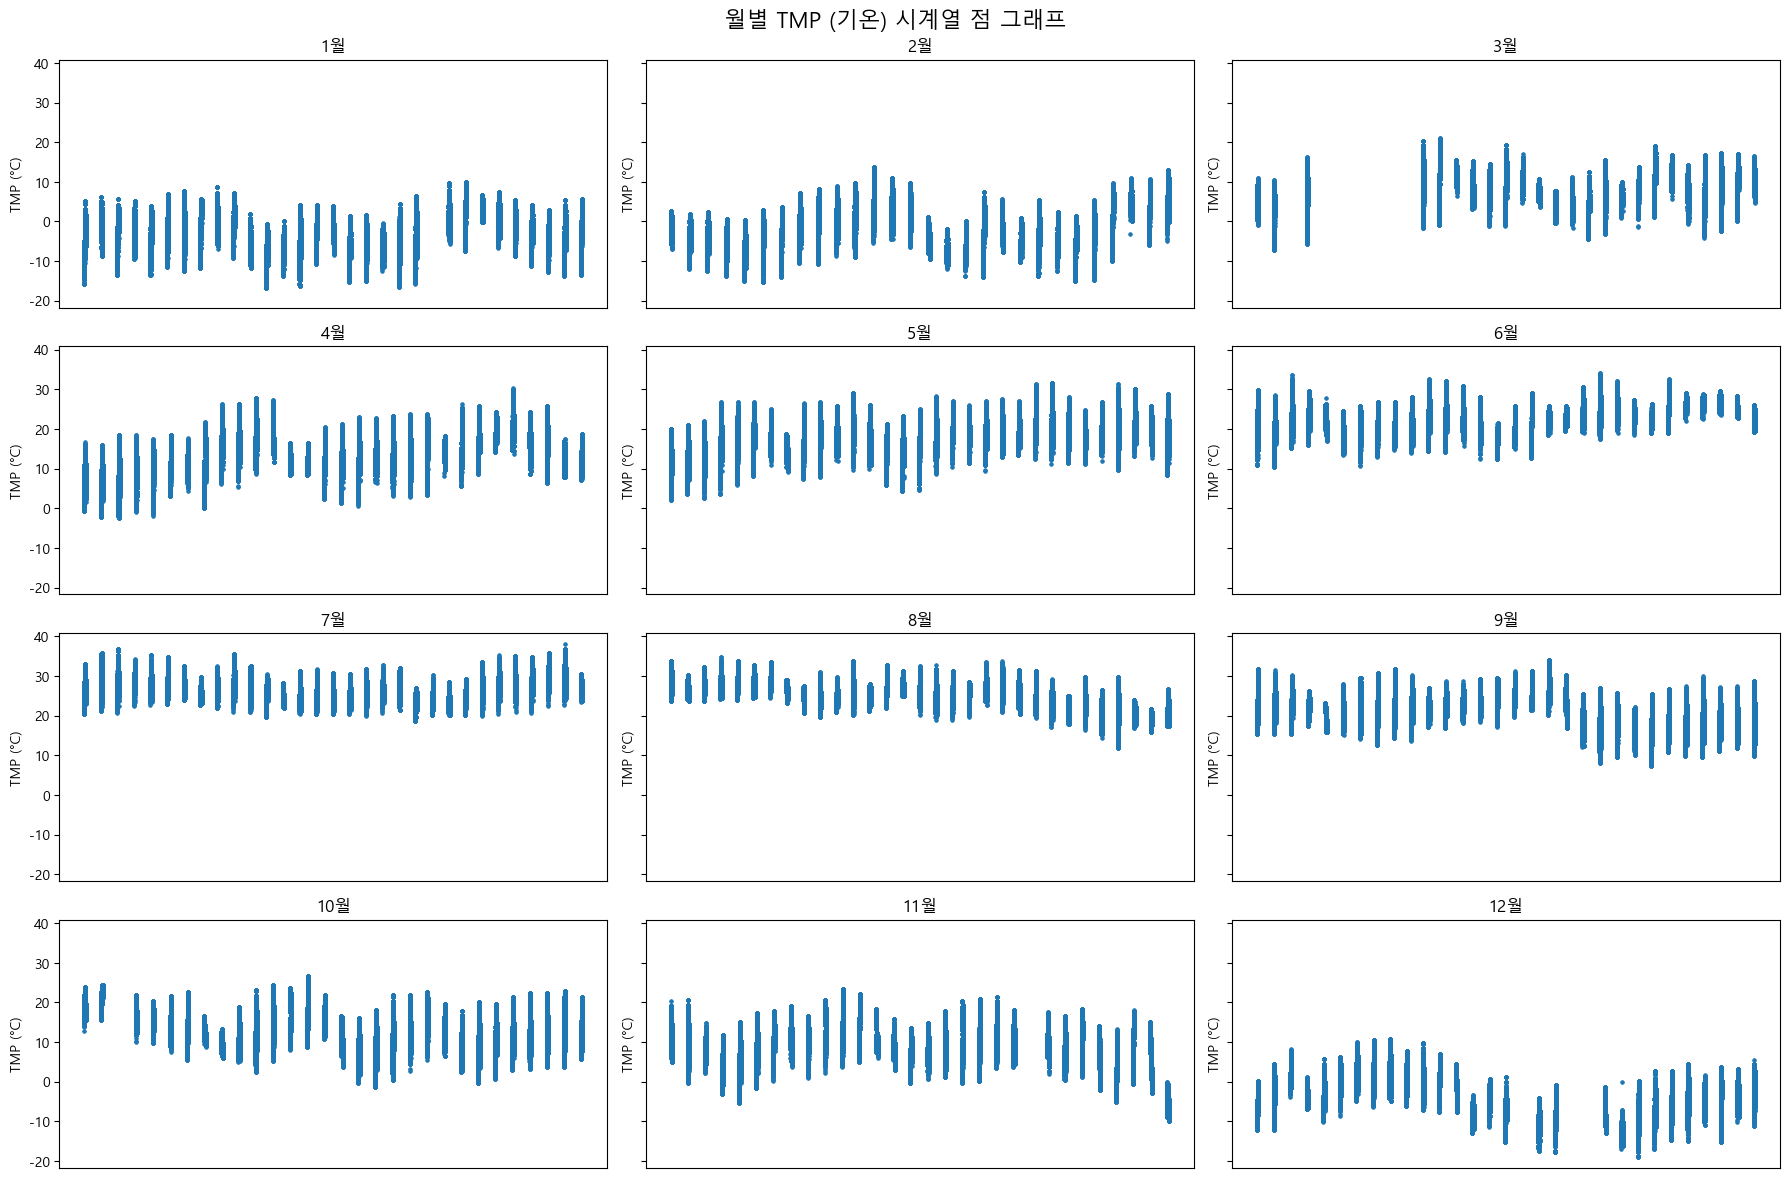

In [64]:
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# datetime Î∞è month Ïª¨Îüº ÏÉùÏÑ±
df_tmp_cleaned['datetime'] = pd.to_datetime(df_tmp_cleaned['datetime'])
df_tmp_cleaned['month'] = df_tmp_cleaned['datetime'].dt.month

# ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

# ÏõîÎ≥Ñ TMP Í∑∏ÎûòÌîÑ (Ï†ïÎ†¨ Ìè¨Ìï®)
for month in range(1, 13):
    ax = axes[month - 1]
    month_df = df_tmp_cleaned[df_tmp_cleaned['month'] == month].sort_values('datetime')
    ax.plot(month_df['datetime'], month_df['TMP'], marker='o', linestyle='None', markersize=2)
    ax.set_title(f"{month}Ïõî")
    ax.set_xticks([])
    ax.set_ylabel("TMP (¬∞C)")

plt.suptitle("ÏõîÎ≥Ñ TMP (Í∏∞Ïò®) ÏãúÍ≥ÑÏó¥ Ï†ê Í∑∏ÎûòÌîÑ", fontsize=16)
plt.tight_layout()
plt.show()


# Í¥ÄÏ∏°Ïπò data Í∞ÄÏ†∏Ïò§Í∏∞

In [61]:
import pandas as pd

# Ï†ïÌôïÌïú ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï
file_path = "data/metro_observe_2022_2024/ÏßÄÌïòÏ≤†Ïó≠_Í¥ÄÏ∏°Îç∞Ïù¥ÌÑ∞_2022.csv"

# CSV Î∂àÎü¨Ïò§Í∏∞ (Ïù∏ÏΩîÎî© ÏûêÎèô Ï≤òÎ¶¨)
try:
    obs_df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    obs_df = pd.read_csv(file_path, encoding='cp949')

# Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
print("‚úÖ Í¥ÄÏ∏° Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å")
display(obs_df.head())

‚úÖ Í¥ÄÏ∏° Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å


name     point_x    point_y  routeType_id  nx   ny  stn_id stn_name  \
0  ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§  127.040572  37.527394           116  61  126     400       Í∞ïÎÇ®   
1  ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§  127.040572  37.527394           116  61  126     400       Í∞ïÎÇ®   
2  ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§  127.040572  37.527394           116  61  126     400       Í∞ïÎÇ®   
3  ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§  127.040572  37.527394           116  61  126     400       Í∞ïÎÇ®   
4  ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§  127.040572  37.527394           116  61  126     400       Í∞ïÎÇ®   

              datetime  TMP  WSD  PCP   REH  
0  2022-01-01 00:00:00 -6.5  1.3  0.0  31.0  
1  2022-02-01 01:00:00  1.3  3.1  0.0  71.0  
2  2022-02-01 02:00:00  0.7  1.9  0.0  59.0  
3  2022-02-01 03:00:00  0.7  1.4  0.0  55.0  
4  2022-02-01 04:00:00 -1.4  1.3  0.0  89.0

In [155]:
df_tmp_cleaned

datetime          tm  line  station_number    name  \
0       2022-01-01 00:00:00  2022010100     1             150     ÏÑúÏö∏Ïó≠   
1       2022-01-01 00:00:00  2022010100     6            2642      ÏõîÍ≥°   
2       2022-01-01 00:00:00  2022010100     1            1821      Ïò®Ïàò   
3       2022-01-01 00:00:00  2022010100     6            2643     ÏÉÅÏõîÍ≥°   
4       2022-01-01 00:00:00  2022010100     6            2643     ÏÉÅÏõîÍ≥°   
...                     ...         ...   ...             ...     ...   
5396195 2022-12-31 02:03:00  2022123123     7            2742    Ïû•ÏäπÎ∞∞Í∏∞   
5396196 2022-12-31 02:03:00  2022123123     3             328      Ïû†Ïõê   
5396197 2022-12-31 02:03:00  2022123123     3             329   Í≥†ÏÜçÌÑ∞ÎØ∏ÎÑê   
5396198 2022-12-31 02:03:00  2022123123     4            1454  Ï†ïÎ∂ÄÍ≥ºÏ≤úÏ≤≠ÏÇ¨   
5396199 2022-12-31 02:03:00  2022123123     8            2828     ÎÇ®ÏúÑÎ°Ä   

        direction  stn  TMP     wd  WSD  ...  PCP   REH    si  ta_chi  \
0              ÏÉÅÏÑ†  419 -9.4   61.0  3.5  ...  0.0  34.0 -99.0   -12.8   
1              ÌïòÏÑ†  408 -7.2  293.0  0.9  ...  0.0  29.7 -99.0    -7.4   
2              ÏÉÅÏÑ†  423 -7.9  337.3  2.1  ...  0.0  42.4 -99.0   -10.8   
3              ÏÉÅÏÑ†  408 -7.2  293.0  0.9  ...  0.0  29.7 -99.0    -7.4   
4              ÌïòÏÑ†  408 -7.2  293.0  0.9  ...  0.0  29.7 -99.0    -7.4   
...           ...  ...  ...    ...  ...  ...  ...   ...   ...     ...   
5396195        ÏÉÅÏÑ†  418  2.3  213.5  1.3  ...  0.0  59.2 -99.0     0.1   
5396196        ÌïòÏÑ†  415 -1.6   14.6  0.4  ...  0.0  71.2 -99.0    -0.7   
5396197        ÏÉÅÏÑ†  889 -3.0  247.6  0.3  ...  0.0  95.5 -99.0    -0.1   
5396198        ÏÉÅÏÑ†  590 -2.2  173.8  1.9  ...  0.0  80.8 -99.0    -1.4   
5396199        ÌïòÏÑ†  572 -2.7  114.5  0.2  ...  0.0  74.3 -99.0    -3.7   

         congestion  year  month  day  hour        date  
0                 0  2022      1    1     0  2022-01-01  
1                 0  2022      1    1     0  2022-01-01  
2                 0  2022      1    1     0  2022-01-01  
3                 0  2022      1    1     0  2022-01-01  
4                 0  2022      1    1     0  2022-01-01  
...             ...   ...    ...  ...   ...         ...  
5396195          10  2022     12   31     2  2022-12-31  
5396196          19  2022     12   31     2  2022-12-31  
5396197          14  2022     12   31     2  2022-12-31  
5396198          17  2022     12   31     2  2022-12-31  
5396199          18  2022     12   31     2  2022-12-31  

[5396200 rows x 21 columns]

In [66]:
obs_df_original = obs_df.copy()

In [154]:
# TMPÍ∞Ä Í≤∞Ï∏°Ïù∏ Ìñâ ÌïÑÌÑ∞ÎßÅ
missing_tmp_df = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]

# Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞
print(f"‚úÖ TMP Í≤∞Ï∏°Ïπò Ìñâ Ïàò: {len(missing_tmp_df)}")
missing_tmp_df.head()

# ÎÇ†Ïßú Î≥Ñ
df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]['datetime'].dt.date.value_counts().sort_index()

‚úÖ TMP Í≤∞Ï∏°Ïπò Ìñâ Ïàò: 33776


datetime
2022-01-11     18
2022-01-12      8
2022-01-13      2
2022-01-20    150
2022-01-26     32
             ... 
2022-11-30     42
2022-12-01     28
2022-12-03      4
2022-12-04      4
2022-12-05      2
Name: count, Length: 219, dtype: int64

In [85]:
# Ïó≠ Î≥Ñ
df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]['stn'].value_counts()

stn
406    6972
435    2710
425    2688
369    2196
540    1980
649    1560
454    1560
451    1464
434    1404
450    1190
572     882
423     860
415     810
433     752
413     720
438     690
421     612
444     604
510     468
437     406
418     360
889     330
400     288
110     288
414     252
590     220
409     192
372     152
373     150
402     140
431     128
419     128
408     104
411      78
108      72
112      70
477      68
532      48
98       36
424      36
407      26
545      22
410      18
412      16
428       8
427       8
565       6
541       4
Name: count, dtype: int64

In [152]:
# ÏãúÍ∞ÑÎåÄÎ≥ÑÎ≥Ñ
df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]['datetime'].dt.hour.value_counts().sort_index()

datetime
0    14332
1    12770
2     6674
Name: count, dtype: int64

In [87]:
# datetime ÌòïÏãù Î≥¥Ïû•
obs_df['datetime'] = pd.to_datetime(obs_df['datetime'])

# year / month / day / hour Ïª¨Îüº ÏÉùÏÑ±
obs_df['year'] = obs_df['datetime'].dt.year
obs_df['month'] = obs_df['datetime'].dt.month
obs_df['day'] = obs_df['datetime'].dt.day
obs_df['hour'] = obs_df['datetime'].dt.hour

In [88]:
obs_df

name     point_x    point_y  routeType_id  nx   ny  stn_id  \
0        ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§  127.040572  37.527394           116  61  126     400   
1        ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§  127.040572  37.527394           116  61  126     400   
2        ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§  127.040572  37.527394           116  61  126     400   
3        ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§  127.040572  37.527394           116  61  126     400   
4        ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§  127.040572  37.527394           116  61  126     400   
...         ...         ...        ...           ...  ..  ...     ...   
5268870   Ïà≠Ïã§ÎåÄÏûÖÍµ¨  126.953991  37.495861             7  59  125     889   
5268871   Ïà≠Ïã§ÎåÄÏûÖÍµ¨  126.953991  37.495861             7  59  125     889   
5268872   Ïà≠Ïã§ÎåÄÏûÖÍµ¨  126.953991  37.495861             7  59  125     889   
5268873   Ïà≠Ïã§ÎåÄÏûÖÍµ¨  126.953991  37.495861             7  59  125     889   
5268874   Ïà≠Ïã§ÎåÄÏûÖÍµ¨  126.953991  37.495861             7  59  125     889   

        stn_name            datetime  TMP  WSD  PCP   REH        date  year  \
0             Í∞ïÎÇ® 2022-01-01 00:00:00 -6.5  1.3  0.0  31.0  2022-01-01  2022   
1             Í∞ïÎÇ® 2022-02-01 01:00:00  1.3  3.1  0.0  71.0  2022-02-01  2022   
2             Í∞ïÎÇ® 2022-02-01 02:00:00  0.7  1.9  0.0  59.0  2022-02-01  2022   
3             Í∞ïÎÇ® 2022-02-01 03:00:00  0.7  1.4  0.0  55.0  2022-02-01  2022   
4             Í∞ïÎÇ® 2022-02-01 04:00:00 -1.4  1.3  0.0  89.0  2022-02-01  2022   
...          ...                 ...  ...  ...  ...   ...         ...   ...   
5268870      ÌòÑÏ∂©Ïõê 2022-12-31 19:00:00 -3.0  0.6  0.0  90.0  2022-12-31  2022   
5268871      ÌòÑÏ∂©Ïõê 2022-12-31 20:00:00 -3.2  0.7  0.0  93.0  2022-12-31  2022   
5268872      ÌòÑÏ∂©Ïõê 2022-12-31 21:00:00 -3.9  0.9  0.0  95.0  2022-12-31  2022   
5268873      ÌòÑÏ∂©Ïõê 2022-12-31 22:00:00 -3.3  0.7  0.0  97.0  2022-12-31  2022   
5268874      ÌòÑÏ∂©Ïõê 2022-12-31 23:00:00 -3.0  0.3  0.0  96.0  2022-12-31  2022   

         month  day  hour  
0            1    1     0  
1            2    1     1  
2            2    1     2  
3            2    1     3  
4            2    1     4  
...        ...  ...   ...  
5268870     12   31    19  
5268871     12   31    20  
5268872     12   31    21  
5268873     12   31    22  
5268874     12   31    23  

[5268875 rows x 18 columns]

In [96]:
# TMP Í≤∞Ï∏°ÏπòÏù∏ Ìñâ ÌïÑÌÑ∞ÎßÅ
tmp_na = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]

# ÎÇ†Ïßú, Ïó≠, Í≤∞Ï∏°Ïπò ÏàòÎüâ ÏßëÍ≥Ñ
na_summary = tmp_na.groupby([tmp_na['datetime'].dt.date, 'name']).size().reset_index(name='na_count')

# Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω (Í∞ÄÎèÖÏÑ±Ïö©)
na_summary = na_summary.rename(columns={'datetime': 'date', 'name': 'station_name'})

# Ï∂úÎ†•
print("‚úÖ ÎÇ†Ïßú / Ïó≠Î≥Ñ TMP Í≤∞Ï∏°Ïπò ÏàòÎüâ:")
print(na_summary)

‚úÖ ÎÇ†Ïßú / Ïó≠Î≥Ñ TMP Í≤∞Ï∏°Ïπò ÏàòÎüâ:
            date station_name  na_count
0     2022-01-11           ÎåÄÍ≥°         2
1     2022-01-11           ÎßàÎëê         2
2     2022-01-11           Î∞±ÏÑù         2
3     2022-01-11           ÏõêÎãπ         2
4     2022-01-11          Ï†ïÎ∞úÏÇ∞         2
...          ...          ...       ...
2201  2022-12-01           ÏàòÏßÑ         4
2202  2022-12-01           Ïã†Ìù•         4
2203  2022-12-03           ÎçïÏ†ï         4
2204  2022-12-04           ÎçïÏ†ï         4
2205  2022-12-05           ÎçïÏ†ï         2

[2206 rows x 3 columns]


In [108]:
# ÎÇ†Ïßú+Ïó≠Î≥Ñ 20Í∞ú Ïù¥ÏÉÅ Í≤∞Ï∏°Ïπò ÌïÑÌÑ∞ÎßÅ (Í∏∞Ï°¥ ÏΩîÎìú)
tmp_na = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]
na_summary = tmp_na.groupby([tmp_na['datetime'].dt.date, 'name']).size().reset_index(name='na_count')
na_20plus = na_summary[na_summary['na_count'] >= 75]

# Î¶¨Ïä§Ìä∏ÏóÖ: "ÎÇ†Ïßú - Ïó≠Î™Ö" Î¨∏ÏûêÏó¥ ÌòïÌÉú
na_20plus_list = na_20plus.apply(lambda row: f"{row['datetime']} - {row['name']} ({row['na_count']}Í±¥)", axis=1).tolist()

# Ï∂úÎ†•
print("‚úÖ ÎÇ†Ïßú+Ïó≠Î≥Ñ TMP Í≤∞Ï∏°Ïπò 75Í±¥ Ïù¥ÏÉÅ Ï°∞Ìï© Î¶¨Ïä§Ìä∏:")
for item in na_20plus_list:
    print(item)

‚úÖ ÎÇ†Ïßú+Ïó≠Î≥Ñ TMP Í≤∞Ï∏°Ïπò 75Í±¥ Ïù¥ÏÉÅ Ï°∞Ìï© Î¶¨Ïä§Ìä∏:
2022-05-08 - ÎÖ∏Ïõê (76Í±¥)
2022-05-08 - ÎèÑÎ¥âÏÇ∞ (76Í±¥)
2022-05-08 - Ï∞ΩÎèô (76Í±¥)
2022-06-04 - ÎÖ∏Ïõê (76Í±¥)
2022-06-04 - ÎèÑÎ¥âÏÇ∞ (76Í±¥)
2022-06-04 - Ï∞ΩÎèô (76Í±¥)
2022-06-05 - ÎÖ∏Ïõê (76Í±¥)
2022-06-05 - ÎèÑÎ¥âÏÇ∞ (76Í±¥)
2022-06-05 - Ï∞ΩÎèô (76Í±¥)
2022-06-06 - ÎÖ∏Ïõê (76Í±¥)
2022-06-06 - ÎèÑÎ¥âÏÇ∞ (76Í±¥)
2022-06-06 - Ï∞ΩÎèô (76Í±¥)
2022-06-26 - ÎÖ∏Ïõê (76Í±¥)
2022-06-26 - ÎèÑÎ¥âÏÇ∞ (76Í±¥)
2022-06-26 - Ï∞ΩÎèô (76Í±¥)
2022-08-09 - ÏÇ¨Îãπ (76Í±¥)
2022-08-10 - Î∂àÍ¥ë (76Í±¥)
2022-08-10 - ÏÇ¨Îãπ (76Í±¥)
2022-08-10 - Ïó∞Ïã†ÎÇ¥ (76Í±¥)
2022-08-11 - ÏÇ¨Îãπ (76Í±¥)
2022-08-12 - ÏÇ¨Îãπ (76Í±¥)
2022-08-13 - ÏÇ¨Îãπ (76Í±¥)
2022-08-14 - ÏÇ¨Îãπ (76Í±¥)
2022-08-15 - ÏÇ¨Îãπ (76Í±¥)
2022-08-16 - ÏÇ¨Îãπ (76Í±¥)
2022-09-11 - ÎÖ∏Ïõê (76Í±¥)
2022-09-11 - ÎèÑÎ¥âÏÇ∞ (76Í±¥)
2022-09-11 - Ï∞ΩÎèô (76Í±¥)
2022-09-12 - ÎÖ∏Ïõê (76Í±¥)
2022-09-12 - ÎèÑÎ¥âÏÇ∞ (76Í±¥)
2022-09-12 - Ï∞ΩÎèô (76Í±¥)
2022-11-26 - Î∂àÍ¥ë (76Í±¥)
2022-11-26 - Ïó∞Ï

In [110]:
# ÎÇ†Ïßú+Ïó≠Î≥Ñ 20Í±¥ Ïù¥ÏÉÅ ÌïÑÌÑ∞ÎßÅ (Í∏∞Ï°¥)
tmp_na = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]
na_summary = tmp_na.groupby([tmp_na['datetime'].dt.date, 'name']).size().reset_index(name='na_count')
na_20plus = na_summary[na_summary['na_count'] >= 70]

# Ïó≠Î≥Ñ Ï∂úÌòÑ ÌöüÏàò ÏßëÍ≥Ñ (Î™á ÎÇ†ÏßúÏóêÏÑú 20Í±¥ Ïù¥ÏÉÅÏù∏ÏßÄ)
station_counts = na_20plus['name'].value_counts()

print("‚úÖ Í≤∞Ï∏°Ïπò 70Í±¥ Ïù¥ÏÉÅ ÎÇ†Ïßú Ï°∞Ìï©ÏóêÏÑú Í∞ÄÏû• ÎßéÏùÄ Ïó≠ TOP 10")
print(station_counts.head(10))

‚úÖ Í≤∞Ï∏°Ïπò 70Í±¥ Ïù¥ÏÉÅ ÎÇ†Ïßú Ï°∞Ìï©ÏóêÏÑú Í∞ÄÏû• ÎßéÏùÄ Ïó≠ TOP 10
name
ÏÇ¨Îãπ     8
ÎÖ∏Ïõê     7
ÎèÑÎ¥âÏÇ∞    7
Ï∞ΩÎèô     7
Î∂àÍ¥ë     2
Ïó∞Ïã†ÎÇ¥    2
Name: count, dtype: int64


In [112]:
target_stations = ['ÏÇ¨Îãπ']

# TMP Í≤∞Ï∏°Ïπò Ìñâ Ï§ë ÎåÄÏÉÅ Ïó≠ ÌïÑÌÑ∞ÎßÅ
tmp_na_target = df_tmp_cleaned[
    (df_tmp_cleaned['TMP'].isna()) &
    (df_tmp_cleaned['name'].isin(target_stations))
]

# ÎÇ†ÏßúÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò ÏßëÍ≥Ñ
date_counts = tmp_na_target.groupby(tmp_na_target['datetime'].dt.date).size().reset_index(name='na_count')

print("üìÖ ÎÇ†ÏßúÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò (ÎåÄÏÉÅ Ïó≠)")
print(date_counts)

üìÖ ÎÇ†ÏßúÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò (ÎåÄÏÉÅ Ïó≠)
      datetime  na_count
0   2022-06-30        52
1   2022-07-01        28
2   2022-08-03         8
3   2022-08-08        12
4   2022-08-09        76
5   2022-08-10        76
6   2022-08-11        76
7   2022-08-12        76
8   2022-08-13        76
9   2022-08-14        76
10  2022-08-15        76
11  2022-08-16        76
12  2022-08-17        28
13  2022-10-25        48
14  2022-10-26        44
15  2022-10-27         4
16  2022-11-07        36
17  2022-11-08        28


In [113]:
# ÏãúÍ∞ÑÎåÄ Ïª¨Îüº ÏÉùÏÑ± (ÏóÜÏúºÎ©¥)
df_tmp_cleaned['hour'] = df_tmp_cleaned['datetime'].dt.hour

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò ÏßëÍ≥Ñ (ÎåÄÏÉÅ Ïó≠)
hour_counts = tmp_na_target.groupby('hour').size().reset_index(name='na_count')

print("‚è∞ ÏãúÍ∞ÑÎåÄÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò (ÎåÄÏÉÅ Ïó≠)")
print(hour_counts)

‚è∞ ÏãúÍ∞ÑÎåÄÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò (ÎåÄÏÉÅ Ïó≠)
    hour  na_count
0      0        48
1      1        48
2      5        48
3      6        52
4      7        56
5      8        48
6      9        48
7     11         4
8     12        44
9     13        44
10    14        44
11    15        48
12    16        44
13    17        44
14    18        44
15    19        44
16    20        44
17    21        48
18    22        48
19    23        48


In [114]:
# datetimeÏù¥ datetime ÌÉÄÏûÖÏù∏ÏßÄ ÌôïÏù∏ Î∞è Î≥ÄÌôò
df_tmp_cleaned['datetime'] = pd.to_datetime(df_tmp_cleaned['datetime'])

# Ï°∞Í±¥ ÌïÑÌÑ∞ÎßÅ
result = df_tmp_cleaned[
    (df_tmp_cleaned['name'] == 'ÏÇ¨Îãπ') &
    (df_tmp_cleaned['datetime'].dt.month == 8) &
    (df_tmp_cleaned['datetime'].dt.day == 9)
]

# Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ ÏÇ¨ÎãπÏó≠ 8Ïõî 9Ïùº Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(result)}")
result

‚úÖ ÏÇ¨ÎãπÏó≠ 8Ïõî 9Ïùº Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 84


datetime          tm  line  station_number name direction  \
3271312 2022-08-09 00:00:00  2022080900     4             433   ÏÇ¨Îãπ        ÏÉÅÏÑ†   
3271334 2022-08-09 00:00:00  2022080900     2             226   ÏÇ¨Îãπ        Ïô∏ÏÑ†   
3271515 2022-08-09 00:00:00  2022080900     2             226   ÏÇ¨Îãπ        ÎÇ¥ÏÑ†   
3271809 2022-08-09 00:00:00  2022080900     4             433   ÏÇ¨Îãπ        ÌïòÏÑ†   
3272148 2022-08-09 00:01:00  2022080901     4             433   ÏÇ¨Îãπ        ÌïòÏÑ†   
...                     ...         ...   ...             ...  ...       ...   
3285976 2022-08-09 02:02:00  2022080922     2             226   ÏÇ¨Îãπ        Ïô∏ÏÑ†   
3286227 2022-08-09 02:03:00  2022080923     4             433   ÏÇ¨Îãπ        ÌïòÏÑ†   
3286300 2022-08-09 02:03:00  2022080923     2             226   ÏÇ¨Îãπ        Ïô∏ÏÑ†   
3286351 2022-08-09 02:03:00  2022080923     2             226   ÏÇ¨Îãπ        ÎÇ¥ÏÑ†   
3286434 2022-08-09 02:03:00  2022080923     4             433   ÏÇ¨Îãπ        ÏÉÅÏÑ†   

         stn  TMP    wd  WSD  ...  PCP  REH    si  ta_chi  congestion  year  \
3271312  425  NaN -99.0  NaN  ...  NaN  NaN -99.0    28.5           2  2022   
3271334  425  NaN -99.0  NaN  ...  NaN  NaN -99.0    28.5           3  2022   
3271515  425  NaN -99.0  NaN  ...  NaN  NaN -99.0    28.5           8  2022   
3271809  425  NaN -99.0  NaN  ...  NaN  NaN -99.0    28.5           1  2022   
3272148  425  NaN -99.0  NaN  ...  NaN  NaN -99.0    28.4           0  2022   
...      ...  ...   ...  ...  ...  ...  ...   ...     ...         ...   ...   
3285976  425  NaN -99.0  NaN  ...  NaN  NaN -99.0    26.9          11  2022   
3286227  425  NaN -99.0  NaN  ...  NaN  NaN -99.0    25.3           7  2022   
3286300  425  NaN -99.0  NaN  ...  NaN  NaN -99.0    25.3           7  2022   
3286351  425  NaN -99.0  NaN  ...  NaN  NaN -99.0    25.3          20  2022   
3286434  425  NaN -99.0  NaN  ...  NaN  NaN -99.0    25.3           4  2022   

         month  day  hour        date  
3271312      8    9     0  2022-08-09  
3271334      8    9     0  2022-08-09  
3271515      8    9     0  2022-08-09  
3271809      8    9     0  2022-08-09  
3272148      8    9     0  2022-08-09  
...        ...  ...   ...         ...  
3285976      8    9     2  2022-08-09  
3286227      8    9     2  2022-08-09  
3286300      8    9     2  2022-08-09  
3286351      8    9     2  2022-08-09  
3286434      8    9     2  2022-08-09  

[84 rows x 21 columns]

In [115]:
# datetimeÏù¥ datetime ÌÉÄÏûÖÏù∏ÏßÄ ÌôïÏù∏ Î∞è Î≥ÄÌôò
df_tmp_cleaned['datetime'] = pd.to_datetime(df_tmp_cleaned['datetime'])

# Ï°∞Í±¥ ÌïÑÌÑ∞ÎßÅ: ÏÇ¨ÎãπÏó≠, 8Ïõî 9Ïùº, TMP Í∞í Ï°¥Ïû¨
result = df_tmp_cleaned[
    (df_tmp_cleaned['name'] == 'ÏÇ¨Îãπ') &
    (df_tmp_cleaned['datetime'].dt.month == 8) &
    (df_tmp_cleaned['datetime'].dt.day == 9) &
    (df_tmp_cleaned['TMP'].notna())
]

# Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ ÏÇ¨ÎãπÏó≠ 8Ïõî 9Ïùº TMP Ï°¥Ïû¨ Ìñâ Í∞úÏàò: {len(result)}")
result


‚úÖ ÏÇ¨ÎãπÏó≠ 8Ïõî 9Ïùº TMP Ï°¥Ïû¨ Ìñâ Í∞úÏàò: 8


datetime          tm  line  station_number name direction  \
3276597 2022-08-09 01:00:00  2022080910     2             226   ÏÇ¨Îãπ        ÎÇ¥ÏÑ†   
3276828 2022-08-09 01:00:00  2022080910     2             226   ÏÇ¨Îãπ        Ïô∏ÏÑ†   
3276966 2022-08-09 01:00:00  2022080910     4             433   ÏÇ¨Îãπ        ÌïòÏÑ†   
3277042 2022-08-09 01:00:00  2022080910     4             433   ÏÇ¨Îãπ        ÏÉÅÏÑ†   
3277234 2022-08-09 01:01:00  2022080911     4             433   ÏÇ¨Îãπ        ÏÉÅÏÑ†   
3277236 2022-08-09 01:01:00  2022080911     4             433   ÏÇ¨Îãπ        ÌïòÏÑ†   
3277658 2022-08-09 01:01:00  2022080911     2             226   ÏÇ¨Îãπ        Ïô∏ÏÑ†   
3277818 2022-08-09 01:01:00  2022080911     2             226   ÏÇ¨Îãπ        ÎÇ¥ÏÑ†   

         stn   TMP    wd  WSD  ...  PCP  REH    si  ta_chi  congestion  year  \
3276597  425  25.6 -99.0  NaN  ...  NaN  NaN  0.37    27.7          22  2022   
3276828  425  25.6 -99.0  NaN  ...  NaN  NaN  0.37    27.7          71  2022   
3276966  425  25.6 -99.0  NaN  ...  NaN  NaN  0.37    27.7          10  2022   
3277042  425  25.6 -99.0  NaN  ...  NaN  NaN  0.37    27.7          20  2022   
3277234  425  24.5 -99.0  NaN  ...  NaN  NaN  0.14    27.9          15  2022   
3277236  425  24.5 -99.0  NaN  ...  NaN  NaN  0.14    27.9          11  2022   
3277658  425  24.5 -99.0  NaN  ...  NaN  NaN  0.14    27.9          43  2022   
3277818  425  24.5 -99.0  NaN  ...  NaN  NaN  0.14    27.9          22  2022   

         month  day  hour        date  
3276597      8    9     1  2022-08-09  
3276828      8    9     1  2022-08-09  
3276966      8    9     1  2022-08-09  
3277042      8    9     1  2022-08-09  
3277234      8    9     1  2022-08-09  
3277236      8    9     1  2022-08-09  
3277658      8    9     1  2022-08-09  
3277818      8    9     1  2022-08-09  

[8 rows x 21 columns]

ÏÇ¨Îãπ : 60, 125 / Í∏∞Ï§Ä : 25 ÎèÑ Ï†Ñ/ÌõÑ ÎÇ†Ïî® 23ÎèÑ - 28ÎèÑ

In [119]:
nxy_df = pd.read_csv("data/ÏßÄÌïòÏ≤†Ïó≠_nxy.csv")  # name, nx, ny Ïª¨Îüº Ìè¨Ìï®ÎêòÏñ¥Ïïº Ìï®

In [129]:
nxy_df

id  name                  address             roadAddress  \
0       100   ÏÜåÏöîÏÇ∞      Í≤ΩÍ∏∞ÎèÑ ÎèôÎëêÏ≤úÏãú ÏÉÅÎ¥âÏïîÎèô 126-3       Í≤ΩÍ∏∞ÎèÑ ÎèôÎëêÏ≤úÏãú ÌèâÌôîÎ°ú 2925   
1     70134    ÎÖ∏Ìè¨        Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Í∏àÏ†ïÍµ¨ ÎÖ∏Ìè¨Îèô 133     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Í∏àÏ†ïÍµ¨ Ï§ëÏïôÎåÄÎ°ú 2238   
2     40146    ÏïàÏã¨       ÎåÄÍµ¨Í¥ëÏó≠Ïãú ÎèôÍµ¨ Í¥¥Ï†ÑÎèô 536-1        ÎåÄÍµ¨Í¥ëÏó≠Ïãú ÎèôÍµ¨ ÏïàÏã¨Î°ú 455   
3     50129    ÌèâÎèô      Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Í¥ëÏÇ∞Íµ¨ ÏõîÏ†ÑÎèô 51-23       Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Í¥ëÏÇ∞Íµ¨ ÌèâÎèôÎ°ú 870   
4     30122    Î∞òÏÑù        ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú Ïú†ÏÑ±Íµ¨ Î∞òÏÑùÎèô 685     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú Ïú†ÏÑ±Íµ¨ Î∂ÅÏú†ÏÑ±ÎåÄÎ°ú 303   
...     ...   ...                      ...                     ...   
1053   1411    ÏïÑÏÇ∞     Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Î∞∞Î∞©Ïùç Ïû•Ïû¨Î¶¨ 268     Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Î∞∞Î∞©Ïùç Ìù¨ÎßùÎ°ú 90   
1054   1412    ÌÉïÏ†ï   Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú ÌÉïÏ†ïÎ©¥ Îß§Í≥°Î¶¨ 472-1  Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú ÌÉïÏ†ïÎ©¥ Îß§Í≥°Ï§ëÏïô6Î°ú 11   
1055   1413    Î∞∞Î∞©   Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Î∞∞Î∞©Ïùç Íµ¨Î†πÎ¶¨ 148-2  Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Î∞∞Î∞©Ïùç Ïò®Ï≤úÎåÄÎ°ú 1967   
1056   1415  Ïò®ÏñëÏò®Ï≤ú        Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Ïò®Ï≤úÎèô 56-9      Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Ïò®Ï≤úÎåÄÎ°ú 1496   
1057   1416    Ïã†Ï∞Ω  Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Ïã†Ï∞ΩÎ©¥ ÌñâÎ™©Î¶¨ 346-49     Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Ïã†Ï∞ΩÎ©¥ ÌñâÎ™©Î°ú 50   

     displayCode displayName  city_id city_name     point_x    point_y  \
0            100        ÏÜåÏöîÏÇ∞Ïó≠     1000        ÏÑúÏö∏  127.061049  37.948747   
1            134         ÎÖ∏Ìè¨Ïó≠     7000        Î∂ÄÏÇ∞  129.094817  35.283594   
2            146         ÏïàÏã¨Ïó≠     4000        ÎåÄÍµ¨  128.733868  35.871249   
3            119         ÌèâÎèôÏó≠     5000        Í¥ëÏ£º  126.769559  35.124754   
4            122         Î∞òÏÑùÏó≠     3000        ÎåÄÏ†Ñ  127.314616  36.392128   
...          ...         ...      ...       ...         ...        ...   
1053        P172         ÏïÑÏÇ∞Ïó≠     1000        ÏÑúÏö∏  127.104573  36.792118   
1054        P173         ÌÉïÏ†ïÏó≠     1000        ÏÑúÏö∏  127.084638  36.788270   
1055        P174         Î∞∞Î∞©Ïó≠     1000        ÏÑúÏö∏  127.052842  36.777592   
1056        P176       Ïò®ÏñëÏò®Ï≤úÏó≠     1000        ÏÑúÏö∏  127.003178  36.780541   
1057        P177         Ïã†Ï∞ΩÏó≠     1000        ÏÑúÏö∏  126.951795  36.769788   

      routeType_id routeType_name  transfers  nx   ny  
0                1            1Ìò∏ÏÑ†        NaN  61  135  
1               71            1Ìò∏ÏÑ†        NaN  98   78  
2               41            1Ìò∏ÏÑ†        NaN  91   91  
3               51            1Ìò∏ÏÑ†        NaN  57   74  
4               31            1Ìò∏ÏÑ†        NaN  66  101  
...            ...            ...        ...  ..  ...  
1053             1            1Ìò∏ÏÑ†        NaN  62  110  
1054             1            1Ìò∏ÏÑ†        NaN  62  110  
1055             1            1Ìò∏ÏÑ†        NaN  61  110  
1056             1            1Ìò∏ÏÑ†        NaN  60  110  
1057             1            1Ìò∏ÏÑ†        NaN  60  109  

[1058 rows x 15 columns]

In [149]:
df_tmp_cleaned

datetime          tm  line  station_number    name  \
0       2022-01-01 00:00:00  2022010100     1             150     ÏÑúÏö∏Ïó≠   
1       2022-01-01 00:00:00  2022010100     6            2642      ÏõîÍ≥°   
2       2022-01-01 00:00:00  2022010100     1            1821      Ïò®Ïàò   
3       2022-01-01 00:00:00  2022010100     6            2643     ÏÉÅÏõîÍ≥°   
4       2022-01-01 00:00:00  2022010100     6            2643     ÏÉÅÏõîÍ≥°   
...                     ...         ...   ...             ...     ...   
5396195 2022-12-31 02:03:00  2022123123     7            2742    Ïû•ÏäπÎ∞∞Í∏∞   
5396196 2022-12-31 02:03:00  2022123123     3             328      Ïû†Ïõê   
5396197 2022-12-31 02:03:00  2022123123     3             329   Í≥†ÏÜçÌÑ∞ÎØ∏ÎÑê   
5396198 2022-12-31 02:03:00  2022123123     4            1454  Ï†ïÎ∂ÄÍ≥ºÏ≤úÏ≤≠ÏÇ¨   
5396199 2022-12-31 02:03:00  2022123123     8            2828     ÎÇ®ÏúÑÎ°Ä   

        direction  stn  TMP     wd  WSD  ...  PCP   REH    si  ta_chi  \
0              ÏÉÅÏÑ†  419 -9.4   61.0  3.5  ...  0.0  34.0 -99.0   -12.8   
1              ÌïòÏÑ†  408 -7.2  293.0  0.9  ...  0.0  29.7 -99.0    -7.4   
2              ÏÉÅÏÑ†  423 -7.9  337.3  2.1  ...  0.0  42.4 -99.0   -10.8   
3              ÏÉÅÏÑ†  408 -7.2  293.0  0.9  ...  0.0  29.7 -99.0    -7.4   
4              ÌïòÏÑ†  408 -7.2  293.0  0.9  ...  0.0  29.7 -99.0    -7.4   
...           ...  ...  ...    ...  ...  ...  ...   ...   ...     ...   
5396195        ÏÉÅÏÑ†  418  2.3  213.5  1.3  ...  0.0  59.2 -99.0     0.1   
5396196        ÌïòÏÑ†  415 -1.6   14.6  0.4  ...  0.0  71.2 -99.0    -0.7   
5396197        ÏÉÅÏÑ†  889 -3.0  247.6  0.3  ...  0.0  95.5 -99.0    -0.1   
5396198        ÏÉÅÏÑ†  590 -2.2  173.8  1.9  ...  0.0  80.8 -99.0    -1.4   
5396199        ÌïòÏÑ†  572 -2.7  114.5  0.2  ...  0.0  74.3 -99.0    -3.7   

         congestion  year  month  day  hour        date  
0                 0  2022      1    1     0  2022-01-01  
1                 0  2022      1    1     0  2022-01-01  
2                 0  2022      1    1     0  2022-01-01  
3                 0  2022      1    1     0  2022-01-01  
4                 0  2022      1    1     0  2022-01-01  
...             ...   ...    ...  ...   ...         ...  
5396195          10  2022     12   31     2  2022-12-31  
5396196          19  2022     12   31     2  2022-12-31  
5396197          14  2022     12   31     2  2022-12-31  
5396198          17  2022     12   31     2  2022-12-31  
5396199          18  2022     12   31     2  2022-12-31  

[5396200 rows x 21 columns]

### ÏòàÎ≥¥Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [126]:
import pandas as pd
import os
import glob

# ÏÉÅÏúÑ ÎîîÎ†âÌÜ†Î¶¨
base_dir = "data/daily_merged_forecast_2022_2024"
years = ['2022', '2023', '2024']

# Ïó∞ÎèÑÎ≥Ñ Î≥ëÌï© Î∞è Ï†ÄÏû•
for year in years:
    year_dir = os.path.join(base_dir, year)
    file_paths = glob.glob(os.path.join(year_dir, "*.csv"))
    
    year_data = []

    for path in file_paths:
        try:
            df = pd.read_csv(path)

            # datetime ÏÉùÏÑ±
            if {'ÎÖÑ', 'Ïõî', 'Ïùº', 'ÏãúÍ∞Å'}.issubset(df.columns):
                df['datetime'] = pd.to_datetime(
                    df[['ÎÖÑ', 'Ïõî', 'Ïùº', 'ÏãúÍ∞Å']].rename(
                        columns={'ÎÖÑ': 'year', 'Ïõî': 'month', 'Ïùº': 'day', 'ÏãúÍ∞Å': 'hour'}
                    )
                )

            # datetimeÏù¥ Ìè¨Ìï®Îêú Ï†ÑÏ≤¥ Ïª¨Îüº Ïú†ÏßÄ
            if 'datetime' in df.columns and 'nx' in df.columns and 'ny' in df.columns:
                year_data.append(df)

        except Exception as e:
            print(f"‚ö†Ô∏è {year} Ï≤òÎ¶¨ Ïã§Ìå®: {path} ‚Üí {e}")

    # Ïó∞ÎèÑÎ≥Ñ Ï†ÄÏû•
    if year_data:
        df_year = pd.concat(year_data, ignore_index=True).drop_duplicates()
        df_year = df_year.sort_values(['datetime', 'nx', 'ny']).reset_index(drop=True)
        output_path = f"Ï†ïÏ†ú_ÏòàÎ≥¥_{year}.csv"
        df_year.to_csv(output_path, index=False, encoding='utf-8-sig')
        print(f"‚úÖ {year} Ï†ÄÏû• ÏôÑÎ£å: {output_path} ({len(df_year):,}Ìñâ)")


‚úÖ 2022 Ï†ÄÏû• ÏôÑÎ£å: Ï†ïÏ†ú_ÏòàÎ≥¥_2022.csv (843,013Ìñâ)
‚úÖ 2023 Ï†ÄÏû• ÏôÑÎ£å: Ï†ïÏ†ú_ÏòàÎ≥¥_2023.csv (793,594Ìñâ)
‚úÖ 2024 Ï†ÄÏû• ÏôÑÎ£å: Ï†ïÏ†ú_ÏòàÎ≥¥_2024.csv (846,192Ìñâ)


In [127]:
df_tmp_cleaned['datetime'] = pd.to_datetime(df_tmp_cleaned['datetime'])
forecast_2022 = pd.read_csv("Ï†ïÏ†ú_ÏòàÎ≥¥_2022.csv", parse_dates=['datetime'])
forecast_2023 = pd.read_csv("Ï†ïÏ†ú_ÏòàÎ≥¥_2023.csv", parse_dates=['datetime'])
forecast_2024 = pd.read_csv("Ï†ïÏ†ú_ÏòàÎ≥¥_2024.csv", parse_dates=['datetime'])

forecast_df = pd.concat([forecast_2022, forecast_2023, forecast_2024], ignore_index=True)

In [128]:
forecast_2023

nx   ny   PCP   POP  PTY   REH  SKY   TMP   WSD     ÎÖÑ   Ïõî   Ïùº  ÏãúÍ∞Å  \
0       50  119 -99.0 -99.0  0.0 -99.0  1.0 -99.0   4.5  2023   1   1   2   
1       50  120 -99.0 -99.0  0.0 -99.0  1.0 -99.0   7.0  2023   1   1   2   
2       50  121 -99.0 -99.0  0.0 -99.0  1.0 -99.0   9.4  2023   1   1   2   
3       50  122 -99.0 -99.0  0.0 -99.0  1.0 -99.0  10.0  2023   1   1   2   
4       50  123 -99.0 -99.0  0.0 -99.0  1.0 -99.0  10.8  2023   1   1   2   
...     ..  ...   ...   ...  ...   ...  ...   ...   ...   ...  ..  ..  ..   
793589  66  131 -99.0 -99.0  0.0 -99.0  4.0 -99.0  12.7  2023  12  31  23   
793590  66  132 -99.0 -99.0  0.0 -99.0  4.0 -99.0  12.7  2023  12  31  23   
793591  66  133 -99.0 -99.0  0.0 -99.0  4.0 -99.0  12.6  2023  12  31  23   
793592  66  134 -99.0 -99.0  0.0 -99.0  4.0 -99.0  12.6  2023  12  31  23   
793593  66  135 -99.0 -99.0  0.0 -99.0  4.0 -99.0  12.6  2023  12  31  23   

                  datetime  
0      2023-01-01 02:00:00  
1      2023-01-01 02:00:00  
2      2023-01-01 02:00:00  
3      2023-01-01 02:00:00  
4      2023-01-01 02:00:00  
...                    ...  
793589 2023-12-31 23:00:00  
793590 2023-12-31 23:00:00  
793591 2023-12-31 23:00:00  
793592 2023-12-31 23:00:00  
793593 2023-12-31 23:00:00  

[793594 rows x 14 columns]

In [136]:
nxy_df

id  name                  address             roadAddress  \
0       100   ÏÜåÏöîÏÇ∞      Í≤ΩÍ∏∞ÎèÑ ÎèôÎëêÏ≤úÏãú ÏÉÅÎ¥âÏïîÎèô 126-3       Í≤ΩÍ∏∞ÎèÑ ÎèôÎëêÏ≤úÏãú ÌèâÌôîÎ°ú 2925   
1     70134    ÎÖ∏Ìè¨        Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Í∏àÏ†ïÍµ¨ ÎÖ∏Ìè¨Îèô 133     Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Í∏àÏ†ïÍµ¨ Ï§ëÏïôÎåÄÎ°ú 2238   
2     40146    ÏïàÏã¨       ÎåÄÍµ¨Í¥ëÏó≠Ïãú ÎèôÍµ¨ Í¥¥Ï†ÑÎèô 536-1        ÎåÄÍµ¨Í¥ëÏó≠Ïãú ÎèôÍµ¨ ÏïàÏã¨Î°ú 455   
3     50129    ÌèâÎèô      Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Í¥ëÏÇ∞Íµ¨ ÏõîÏ†ÑÎèô 51-23       Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Í¥ëÏÇ∞Íµ¨ ÌèâÎèôÎ°ú 870   
4     30122    Î∞òÏÑù        ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú Ïú†ÏÑ±Íµ¨ Î∞òÏÑùÎèô 685     ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú Ïú†ÏÑ±Íµ¨ Î∂ÅÏú†ÏÑ±ÎåÄÎ°ú 303   
...     ...   ...                      ...                     ...   
1053   1411    ÏïÑÏÇ∞     Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Î∞∞Î∞©Ïùç Ïû•Ïû¨Î¶¨ 268     Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Î∞∞Î∞©Ïùç Ìù¨ÎßùÎ°ú 90   
1054   1412    ÌÉïÏ†ï   Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú ÌÉïÏ†ïÎ©¥ Îß§Í≥°Î¶¨ 472-1  Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú ÌÉïÏ†ïÎ©¥ Îß§Í≥°Ï§ëÏïô6Î°ú 11   
1055   1413    Î∞∞Î∞©   Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Î∞∞Î∞©Ïùç Íµ¨Î†πÎ¶¨ 148-2  Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Î∞∞Î∞©Ïùç Ïò®Ï≤úÎåÄÎ°ú 1967   
1056   1415  Ïò®ÏñëÏò®Ï≤ú        Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Ïò®Ï≤úÎèô 56-9      Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Ïò®Ï≤úÎåÄÎ°ú 1496   
1057   1416    Ïã†Ï∞Ω  Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Ïã†Ï∞ΩÎ©¥ ÌñâÎ™©Î¶¨ 346-49     Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú Ïã†Ï∞ΩÎ©¥ ÌñâÎ™©Î°ú 50   

     displayCode displayName  city_id city_name     point_x    point_y  \
0            100        ÏÜåÏöîÏÇ∞Ïó≠     1000        ÏÑúÏö∏  127.061049  37.948747   
1            134         ÎÖ∏Ìè¨Ïó≠     7000        Î∂ÄÏÇ∞  129.094817  35.283594   
2            146         ÏïàÏã¨Ïó≠     4000        ÎåÄÍµ¨  128.733868  35.871249   
3            119         ÌèâÎèôÏó≠     5000        Í¥ëÏ£º  126.769559  35.124754   
4            122         Î∞òÏÑùÏó≠     3000        ÎåÄÏ†Ñ  127.314616  36.392128   
...          ...         ...      ...       ...         ...        ...   
1053        P172         ÏïÑÏÇ∞Ïó≠     1000        ÏÑúÏö∏  127.104573  36.792118   
1054        P173         ÌÉïÏ†ïÏó≠     1000        ÏÑúÏö∏  127.084638  36.788270   
1055        P174         Î∞∞Î∞©Ïó≠     1000        ÏÑúÏö∏  127.052842  36.777592   
1056        P176       Ïò®ÏñëÏò®Ï≤úÏó≠     1000        ÏÑúÏö∏  127.003178  36.780541   
1057        P177         Ïã†Ï∞ΩÏó≠     1000        ÏÑúÏö∏  126.951795  36.769788   

      routeType_id routeType_name  transfers  nx   ny  
0                1            1Ìò∏ÏÑ†        NaN  61  135  
1               71            1Ìò∏ÏÑ†        NaN  98   78  
2               41            1Ìò∏ÏÑ†        NaN  91   91  
3               51            1Ìò∏ÏÑ†        NaN  57   74  
4               31            1Ìò∏ÏÑ†        NaN  66  101  
...            ...            ...        ...  ..  ...  
1053             1            1Ìò∏ÏÑ†        NaN  62  110  
1054             1            1Ìò∏ÏÑ†        NaN  62  110  
1055             1            1Ìò∏ÏÑ†        NaN  61  110  
1056             1            1Ìò∏ÏÑ†        NaN  60  110  
1057             1            1Ìò∏ÏÑ†        NaN  60  109  

[1058 rows x 15 columns]

In [158]:
na_rows = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()].copy()
print(na_rows.columns.tolist())

['datetime', 'tm', 'line', 'station_number', 'name', 'direction', 'stn', 'TMP', 'wd', 'WSD', 'rn_day', 'PCP', 'REH', 'si', 'ta_chi', 'congestion', 'year', 'month', 'day', 'hour', 'date']


In [159]:
na_rows = na_rows.drop(columns=['nx', 'ny'], errors='ignore')
na_rows = na_rows.merge(nxy_df[['name', 'nx', 'ny']], on='name', how='left')
na_rows

datetime          tm  line  station_number   name direction  \
0     2022-01-11 00:05:00  2022011105     5            2566  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞        ÏÉÅÏÑ†   
1     2022-01-11 00:05:00  2022011105     5            2565   ÌïòÎÇ®ÏãúÏ≤≠        ÌïòÏÑ†   
2     2022-01-11 00:05:00  2022011105     5            2566  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞        ÌïòÏÑ†   
3     2022-01-11 00:05:00  2022011105     5            2565   ÌïòÎÇ®ÏãúÏ≤≠        ÏÉÅÏÑ†   
4     2022-01-11 02:03:00  2022011123     3            1956    Ï†ïÎ∞úÏÇ∞        ÌïòÏÑ†   
...                   ...         ...   ...             ...    ...       ...   
46927 2022-12-04 01:04:00  2022120414     1            1911     ÎçïÏ†ï        ÏÉÅÏÑ†   
46928 2022-12-04 01:07:00  2022120417     1            1911     ÎçïÏ†ï        ÌïòÏÑ†   
46929 2022-12-04 01:07:00  2022120417     1            1911     ÎçïÏ†ï        ÏÉÅÏÑ†   
46930 2022-12-05 00:07:00  2022120507     1            1911     ÎçïÏ†ï        ÏÉÅÏÑ†   
46931 2022-12-05 00:07:00  2022120507     1            1911     ÎçïÏ†ï        ÌïòÏÑ†   

       stn  TMP    wd  WSD  ...     si  ta_chi  congestion  year  month  day  \
0      444  NaN -99.0  NaN  ... -99.00    -9.2           5  2022      1   11   
1      444  NaN -99.0  NaN  ... -99.00    -9.2           0  2022      1   11   
2      444  NaN -99.0  NaN  ... -99.00    -9.2           0  2022      1   11   
3      444  NaN -99.0  NaN  ... -99.00    -9.2           9  2022      1   11   
4      450  NaN -99.0  NaN  ... -99.00   -10.4           1  2022      1   11   
...    ...  ...   ...  ...  ...    ...     ...         ...   ...    ...  ...   
46927  372  NaN -99.0  NaN  ...   1.00    -1.8          14  2022     12    4   
46928  372  NaN -99.0  NaN  ...   0.16    -2.6          22  2022     12    4   
46929  372  NaN -99.0  NaN  ...   0.16    -2.6          24  2022     12    4   
46930  372  NaN -99.0  NaN  ... -99.00    -8.6           7  2022     12    5   
46931  372  NaN -99.0  NaN  ... -99.00    -8.6          21  2022     12    5   

       hour        date    nx     ny  
0         0  2022-01-11  64.0  126.0  
1         0  2022-01-11  64.0  126.0  
2         0  2022-01-11  64.0  126.0  
3         0  2022-01-11  64.0  126.0  
4         2  2022-01-11  56.0  129.0  
...     ...         ...   ...    ...  
46927     1  2022-12-04  61.0  133.0  
46928     1  2022-12-04  61.0  133.0  
46929     1  2022-12-04  61.0  133.0  
46930     0  2022-12-05  61.0  133.0  
46931     0  2022-12-05  61.0  133.0  

[46932 rows x 23 columns]

In [160]:
print(na_rows.head())
print(len(na_rows))

             datetime          tm  line  station_number   name direction  stn  \
0 2022-01-11 00:05:00  2022011105     5            2566  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞        ÏÉÅÏÑ†  444   
1 2022-01-11 00:05:00  2022011105     5            2565   ÌïòÎÇ®ÏãúÏ≤≠        ÌïòÏÑ†  444   
2 2022-01-11 00:05:00  2022011105     5            2566  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞        ÌïòÏÑ†  444   
3 2022-01-11 00:05:00  2022011105     5            2565   ÌïòÎÇ®ÏãúÏ≤≠        ÏÉÅÏÑ†  444   
4 2022-01-11 02:03:00  2022011123     3            1956    Ï†ïÎ∞úÏÇ∞        ÌïòÏÑ†  450   

   TMP    wd  WSD  ...    si  ta_chi  congestion  year  month  day  hour  \
0  NaN -99.0  NaN  ... -99.0    -9.2           5  2022      1   11     0   
1  NaN -99.0  NaN  ... -99.0    -9.2           0  2022      1   11     0   
2  NaN -99.0  NaN  ... -99.0    -9.2           0  2022      1   11     0   
3  NaN -99.0  NaN  ... -99.0    -9.2           9  2022      1   11     0   
4  NaN -99.0  NaN  ... -99.0   -10.4           1  2022      1   11     

In [162]:
# ÌôïÏù∏ÌïòÍ≥† Ïã∂ÏùÄ Í∞í ÏòàÏãú
dt = pd.to_datetime("2022-08-09 02:00:00")
x = 60
y = 127

# Ï°∞Ìöå
result = forecast_2022[
    (forecast_2022['datetime'] == dt) &
    (forecast_2022['nx'] == x) &
    (forecast_2022['ny'] == y)
]

print(result[['datetime', 'nx', 'ny', 'TMP']])


                  datetime  nx   ny   TMP
507951 2022-08-09 02:00:00  60  127 -99.0


In [163]:
# Í≤∞Ï∏°Ïπò ÎåÄÏÉÅ row ÏòàÏãú
dt = pd.to_datetime("2022-08-09 02:00:00")
x, y = 60, 127

In [165]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏Ìï† ÎåÄÏÉÅ
dt = pd.to_datetime("2022-08-09 02:00:00")
x, y = 60, 127

# 1. ÎèôÏùºÌïú nx, ny Î®ºÏ†Ä Ï°∞Ìöå
exact_mask = (
    (forecast_2022['datetime'] == dt) &
    (forecast_2022['nx'] == x) &
    (forecast_2022['ny'] == y)
)
exact_vals = forecast_2022.loc[exact_mask, 'TMP']
exact_vals = exact_vals[exact_vals != -99.0]

if not exact_vals.empty:
    print(f"‚úÖ ÎèôÏùºÍ≤©Ïûê ÌèâÍ∑† TMP: {exact_vals.mean():.2f}")
else:
    # 2. nx¬±1, ny¬±1 Ïù¥ÏõÉ Í≤©Ïûê ÌèâÍ∑†
    neighbor_mask = (
        (forecast_2022['datetime'] == dt) &
        (forecast_2022['nx'].between(x - 1, x + 1)) &
        (forecast_2022['ny'].between(y - 1, y + 1))
    )
    neighbors = forecast_2022.loc[neighbor_mask, 'TMP']
    neighbors = neighbors[neighbors != -99.0]

    if not neighbors.empty:
        print(f"‚úÖ Ïù∏Ï†ëÍ≤©Ïûê ÌèâÍ∑† TMP: {neighbors.mean():.2f}")
    else:
        print("‚ùå Ïú†Ìö® TMP ÏóÜÏùå: Î≥¥Í∞Ñ Î∂àÍ∞Ä")


‚úÖ Ïù∏Ï†ëÍ≤©Ïûê ÌèâÍ∑† TMP: 26.67


### TMP Î≥¥Í∞Ñ Î∞©Ïãù ÏöîÏïΩ

- **1ÏàúÏúÑ**: Í∞ôÏùÄ `datetime`, `nx`, `ny` ÏúÑÏπòÏùò TMP ÌèâÍ∑†Í∞í ÏÇ¨Ïö© (Îã®, -99.0 Ï†úÏô∏)
- **2ÏàúÏúÑ**: Ìï¥Îãπ ÏúÑÏπòÍ∞Ä ÏóÜÏùÑ Í≤ΩÏö∞ `nx¬±1`, `ny¬±1` Î≤îÏúÑÏóêÏÑú TMP ÌèâÍ∑†Í∞í ÏÇ¨Ïö© (-99.0 Ï†úÏô∏)
- **Í≤∞Í≥º Ï≤òÎ¶¨**: ÌèâÍ∑†Í∞íÏùÄ ÏÜåÏàòÏ†ê 1ÏûêÎ¶¨ÍπåÏßÄ Î∞òÏò¨Î¶ºÌïòÏó¨ Í≤∞Ï∏°ÏπòÏóê Î∞òÏòÅ

In [167]:
def fill_missing_tmp(main_df, forecast_df, target_col='TMP'):
    from collections import defaultdict

    # 1. TMP Í∞íÏù¥ -99Í∞Ä ÏïÑÎãå Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©
    valid_forecast = forecast_df[forecast_df[target_col] != -99.0]

    # 2. (datetime, nx, ny) ‚Üí TMP Î¶¨Ïä§Ìä∏ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
    forecast_dict = defaultdict(list)
    for row in valid_forecast.itertuples():
        forecast_dict[(row.datetime, row.nx, row.ny)].append(getattr(row, target_col))

    # 3. ÌèâÍ∑†Í∞íÏúºÎ°ú Î≥ÄÌôò
    forecast_mean = {
        key: round(sum(vals)/len(vals), 1)
        for key, vals in forecast_dict.items()
    }

    # 4. Í≤∞Ï∏°Ïπò ÏúÑÏπòÎßå Ï∂îÏ∂ú
    na_rows = main_df[main_df[target_col].isna()]
    filled_values = []

    # 5. Îπ†Î•∏ Î≥¥Í∞Ñ ÏàòÌñâ
    for row in na_rows.itertuples():
        dt, x, y = row.datetime, row.nx, row.ny
        idx = row.Index

        exact_key = (dt, x, y)
        if exact_key in forecast_mean:
            filled_values.append((idx, forecast_mean[exact_key]))
            continue

        # Ïù∏Ï†ë Í≤©Ïûê ÌèâÍ∑†
        neighbors = []
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                key = (dt, x + dx, y + dy)
                if key in forecast_mean:
                    neighbors.append(forecast_mean[key])

        interp_val = round(sum(neighbors)/len(neighbors), 1) if neighbors else None
        filled_values.append((idx, interp_val))

    # 6. Î≥¥Í∞Ñ Í≤∞Í≥º Î∞òÏòÅ
    for idx, val in filled_values:
        if val is not None:
            main_df.at[idx, target_col] = val

    # 7. Î≥¥Í∞Ñ Î°úÍ∑∏ Ï∂úÎ†•
    print(f"‚úÖ {len(filled_values)}Í∞ú Ï§ë {sum(v is not None for _, v in filled_values)}Í∞ú TMP Î≥¥Í∞Ñ ÏôÑÎ£å")

    return filled_values


In [173]:
filled_values = fill_missing_tmp(na_rows, forecast_2022)

‚úÖ 44958Í∞ú Ï§ë 0Í∞ú TMP Î≥¥Í∞Ñ ÏôÑÎ£å


In [172]:
filled_df = pd.DataFrame(filled_values, columns=['index', 'filled_TMP'])
filled_df = filled_df.merge(na_rows[['datetime', 'name']], left_on='index', right_index=True)
filled_df = filled_df[['datetime', 'name', 'filled_TMP']]
filled_df

datetime   name  filled_TMP
0     2022-01-11 00:05:00  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞         NaN
1     2022-01-11 00:05:00   ÌïòÎÇ®ÏãúÏ≤≠         NaN
2     2022-01-11 00:05:00  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞         NaN
3     2022-01-11 00:05:00   ÌïòÎÇ®ÏãúÏ≤≠         NaN
4     2022-01-11 02:03:00    Ï†ïÎ∞úÏÇ∞         NaN
...                   ...    ...         ...
46927 2022-12-04 01:04:00     ÎçïÏ†ï         NaN
46928 2022-12-04 01:07:00     ÎçïÏ†ï         NaN
46929 2022-12-04 01:07:00     ÎçïÏ†ï         NaN
46930 2022-12-05 00:07:00     ÎçïÏ†ï         NaN
46931 2022-12-05 00:07:00     ÎçïÏ†ï         NaN

[46932 rows x 3 columns]

In [174]:
na_rows

datetime          tm  line  station_number   name direction  \
0     2022-01-11 00:05:00  2022011105     5            2566  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞        ÏÉÅÏÑ†   
1     2022-01-11 00:05:00  2022011105     5            2565   ÌïòÎÇ®ÏãúÏ≤≠        ÌïòÏÑ†   
2     2022-01-11 00:05:00  2022011105     5            2566  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞        ÌïòÏÑ†   
3     2022-01-11 00:05:00  2022011105     5            2565   ÌïòÎÇ®ÏãúÏ≤≠        ÏÉÅÏÑ†   
4     2022-01-11 02:03:00  2022011123     3            1956    Ï†ïÎ∞úÏÇ∞        ÌïòÏÑ†   
...                   ...         ...   ...             ...    ...       ...   
46927 2022-12-04 01:04:00  2022120414     1            1911     ÎçïÏ†ï        ÏÉÅÏÑ†   
46928 2022-12-04 01:07:00  2022120417     1            1911     ÎçïÏ†ï        ÌïòÏÑ†   
46929 2022-12-04 01:07:00  2022120417     1            1911     ÎçïÏ†ï        ÏÉÅÏÑ†   
46930 2022-12-05 00:07:00  2022120507     1            1911     ÎçïÏ†ï        ÏÉÅÏÑ†   
46931 2022-12-05 00:07:00  2022120507     1            1911     ÎçïÏ†ï        ÌïòÏÑ†   

       stn  TMP    wd  WSD  ...     si  ta_chi  congestion  year  month  day  \
0      444  NaN -99.0  NaN  ... -99.00    -9.2           5  2022      1   11   
1      444  NaN -99.0  NaN  ... -99.00    -9.2           0  2022      1   11   
2      444  NaN -99.0  NaN  ... -99.00    -9.2           0  2022      1   11   
3      444  NaN -99.0  NaN  ... -99.00    -9.2           9  2022      1   11   
4      450  NaN -99.0  NaN  ... -99.00   -10.4           1  2022      1   11   
...    ...  ...   ...  ...  ...    ...     ...         ...   ...    ...  ...   
46927  372  NaN -99.0  NaN  ...   1.00    -1.8          14  2022     12    4   
46928  372  NaN -99.0  NaN  ...   0.16    -2.6          22  2022     12    4   
46929  372  NaN -99.0  NaN  ...   0.16    -2.6          24  2022     12    4   
46930  372  NaN -99.0  NaN  ... -99.00    -8.6           7  2022     12    5   
46931  372  NaN -99.0  NaN  ... -99.00    -8.6          21  2022     12    5   

       hour        date    nx     ny  
0         0  2022-01-11  64.0  126.0  
1         0  2022-01-11  64.0  126.0  
2         0  2022-01-11  64.0  126.0  
3         0  2022-01-11  64.0  126.0  
4         2  2022-01-11  56.0  129.0  
...     ...         ...   ...    ...  
46927     1  2022-12-04  61.0  133.0  
46928     1  2022-12-04  61.0  133.0  
46929     1  2022-12-04  61.0  133.0  
46930     0  2022-12-05  61.0  133.0  
46931     0  2022-12-05  61.0  133.0  

[46932 rows x 23 columns]

In [177]:
tmp_na_rows = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]

In [178]:
print(f"TMP Í≤∞Ï∏°Ïπò Ï¥ù {tmp_na_rows.shape[0]}Í±¥")

TMP Í≤∞Ï∏°Ïπò Ï¥ù 33776Í±¥


44958 -> 33776 Í∞êÏÜå

### ÏãúÍ∞ÑÏ∂ï Í∏∞Ï§Ä Î≥¥Í∞Ñ

In [179]:
df_tmp_backup = df_tmp_cleaned.copy(deep=True)

In [182]:
from collections import defaultdict
from datetime import timedelta

# 1. Ïú†Ìö® TMP Í∞íÎßå Ï∫êÏã± (name, datetime) ‚Üí TMP
valid_tmp = df_tmp_cleaned[
    df_tmp_cleaned['TMP'].notna() &
    (df_tmp_cleaned['TMP'] != -99.0)
]

tmp_dict = defaultdict(list)
for row in valid_tmp.itertuples():
    tmp_dict[(row.name, row.datetime)].append(row.TMP)

# 2. ÌèâÍ∑† Ï∫êÏãú ÎîïÏÖîÎÑàÎ¶¨
tmp_mean = {
    key: round(sum(vals)/len(vals), 1)
    for key, vals in tmp_dict.items()
}

In [183]:
filled_values = []

for row in df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()].itertuples():
    name = row.name
    dt = row.datetime
    idx = row.Index

    dt_candidates = [dt + timedelta(hours=delta) for delta in [-1, 1]]

    candidate_vals = [
        tmp_mean[(name, t)]
        for t in dt_candidates
        if (name, t) in tmp_mean
    ]

    if candidate_vals:
        interp_val = round(sum(candidate_vals) / len(candidate_vals), 1)
        df_tmp_cleaned.at[idx, 'TMP'] = interp_val
        filled_values.append((idx, interp_val))


In [184]:
print(f"‚úÖ Î≥¥Í∞Ñ ÏôÑÎ£åÎêú TMP Í∞úÏàò: {len(filled_values)}Í∞ú")

‚úÖ Î≥¥Í∞Ñ ÏôÑÎ£åÎêú TMP Í∞úÏàò: 18314Í∞ú


In [ ]:
na_count = df_tmp_cleaned['TMP'].isna().sum()
print(f"ÌòÑÏû¨ TMP Í≤∞Ï∏°Ïπò Í∞úÏàò: {na_count}Í∞ú")

ÌòÑÏû¨ TMP Í≤∞Ï∏°Ïπò Í∞úÏàò: 15154Í∞ú


In [186]:
df_tmp_cleaned

datetime          tm  line  station_number    name  \
0       2022-01-01 00:00:00  2022010100     1             150     ÏÑúÏö∏Ïó≠   
1       2022-01-01 00:00:00  2022010100     6            2642      ÏõîÍ≥°   
2       2022-01-01 00:00:00  2022010100     1            1821      Ïò®Ïàò   
3       2022-01-01 00:00:00  2022010100     6            2643     ÏÉÅÏõîÍ≥°   
4       2022-01-01 00:00:00  2022010100     6            2643     ÏÉÅÏõîÍ≥°   
...                     ...         ...   ...             ...     ...   
5396195 2022-12-31 02:03:00  2022123123     7            2742    Ïû•ÏäπÎ∞∞Í∏∞   
5396196 2022-12-31 02:03:00  2022123123     3             328      Ïû†Ïõê   
5396197 2022-12-31 02:03:00  2022123123     3             329   Í≥†ÏÜçÌÑ∞ÎØ∏ÎÑê   
5396198 2022-12-31 02:03:00  2022123123     4            1454  Ï†ïÎ∂ÄÍ≥ºÏ≤úÏ≤≠ÏÇ¨   
5396199 2022-12-31 02:03:00  2022123123     8            2828     ÎÇ®ÏúÑÎ°Ä   

        direction  stn  TMP     wd  WSD  ...  PCP   REH    si  ta_chi  \
0              ÏÉÅÏÑ†  419 -9.4   61.0  3.5  ...  0.0  34.0 -99.0   -12.8   
1              ÌïòÏÑ†  408 -7.2  293.0  0.9  ...  0.0  29.7 -99.0    -7.4   
2              ÏÉÅÏÑ†  423 -7.9  337.3  2.1  ...  0.0  42.4 -99.0   -10.8   
3              ÏÉÅÏÑ†  408 -7.2  293.0  0.9  ...  0.0  29.7 -99.0    -7.4   
4              ÌïòÏÑ†  408 -7.2  293.0  0.9  ...  0.0  29.7 -99.0    -7.4   
...           ...  ...  ...    ...  ...  ...  ...   ...   ...     ...   
5396195        ÏÉÅÏÑ†  418  2.3  213.5  1.3  ...  0.0  59.2 -99.0     0.1   
5396196        ÌïòÏÑ†  415 -1.6   14.6  0.4  ...  0.0  71.2 -99.0    -0.7   
5396197        ÏÉÅÏÑ†  889 -3.0  247.6  0.3  ...  0.0  95.5 -99.0    -0.1   
5396198        ÏÉÅÏÑ†  590 -2.2  173.8  1.9  ...  0.0  80.8 -99.0    -1.4   
5396199        ÌïòÏÑ†  572 -2.7  114.5  0.2  ...  0.0  74.3 -99.0    -3.7   

         congestion  year  month  day  hour        date  
0                 0  2022      1    1     0  2022-01-01  
1                 0  2022      1    1     0  2022-01-01  
2                 0  2022      1    1     0  2022-01-01  
3                 0  2022      1    1     0  2022-01-01  
4                 0  2022      1    1     0  2022-01-01  
...             ...   ...    ...  ...   ...         ...  
5396195          10  2022     12   31     2  2022-12-31  
5396196          19  2022     12   31     2  2022-12-31  
5396197          14  2022     12   31     2  2022-12-31  
5396198          17  2022     12   31     2  2022-12-31  
5396199          18  2022     12   31     2  2022-12-31  

[5396200 rows x 21 columns]

In [187]:
import matplotlib.pyplot as plt

# 8Ïõî(2022-08) & ÏÇ¨ÎãπÏó≠ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
mask = (
    (df_tmp_cleaned['name'] == 'ÏÇ¨Îãπ') &
    (df_tmp_cleaned['datetime'].dt.to_period('M') == '2022-08')
)
sadang_aug = df_tmp_cleaned.loc[mask].copy()


In [188]:
sadang_aug['TMP_isna'] = sadang_aug['TMP'].isna()

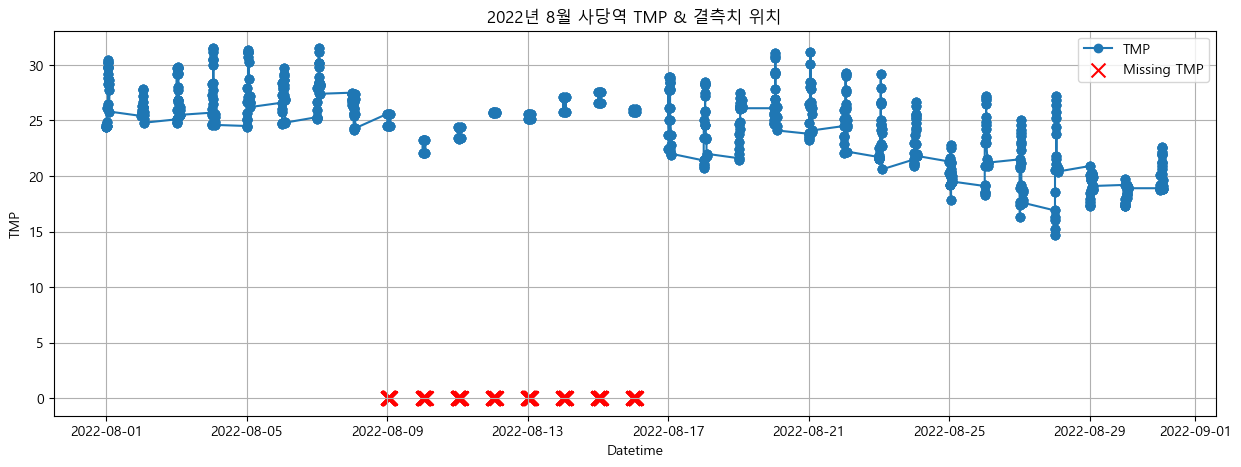

In [191]:
plt.figure(figsize=(15,5))
plt.plot(sadang_aug['datetime'], sadang_aug['TMP'], label='TMP', marker='o')

# Í≤∞Ï∏°ÏπòÎäî Îπ®Í∞Ñ Ï†êÏúºÎ°ú ÌëúÏãú
plt.scatter(
    sadang_aug.loc[sadang_aug['TMP_isna'], 'datetime'],
    [0]*sadang_aug['TMP_isna'].sum(),  # y=0Ïóê ÌëúÏãú
    color='red',
    label='Missing TMP',
    marker='x',
    s=100
)

plt.title('2022ÎÖÑ 8Ïõî ÏÇ¨ÎãπÏó≠ TMP & Í≤∞Ï∏°Ïπò ÏúÑÏπò')
plt.xlabel('Datetime')
plt.ylabel('TMP')
plt.legend()
plt.grid(True)
plt.show()


In [192]:
import matplotlib.pyplot as plt

# ÏÇ¨ÎãπÏó≠ & Í∏∞Í∞Ñ ÌïÑÌÑ∞ (2022-08-05 ~ 2022-08-17)
mask = (
    (df_tmp_cleaned['name'] == 'ÏÇ¨Îãπ') &
    (df_tmp_cleaned['datetime'] >= '2022-08-05') &
    (df_tmp_cleaned['datetime'] <= '2022-08-17')
)
sadang_period = df_tmp_cleaned.loc[mask].copy()


In [193]:
sadang_period['TMP_isna'] = sadang_period['TMP'].isna()

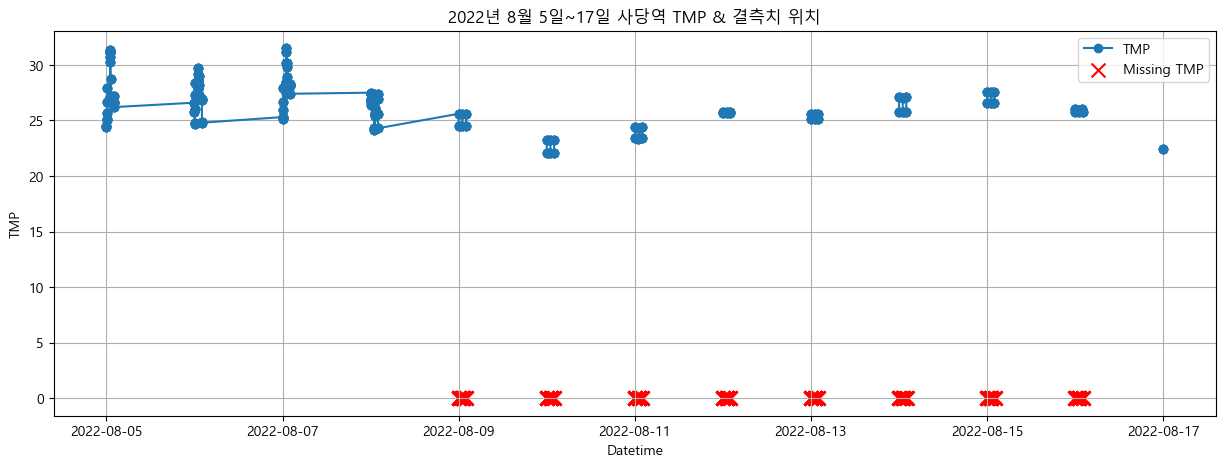

In [194]:
plt.figure(figsize=(15,5))
plt.plot(sadang_period['datetime'], sadang_period['TMP'], label='TMP', marker='o')

plt.scatter(
    sadang_period.loc[sadang_period['TMP_isna'], 'datetime'],
    [0]*sadang_period['TMP_isna'].sum(),
    color='red',
    label='Missing TMP',
    marker='x',
    s=100
)

plt.title('2022ÎÖÑ 8Ïõî 5Ïùº~17Ïùº ÏÇ¨ÎãπÏó≠ TMP & Í≤∞Ï∏°Ïπò ÏúÑÏπò')
plt.xlabel('Datetime')
plt.ylabel('TMP')
plt.legend()
plt.grid(True)
plt.show()


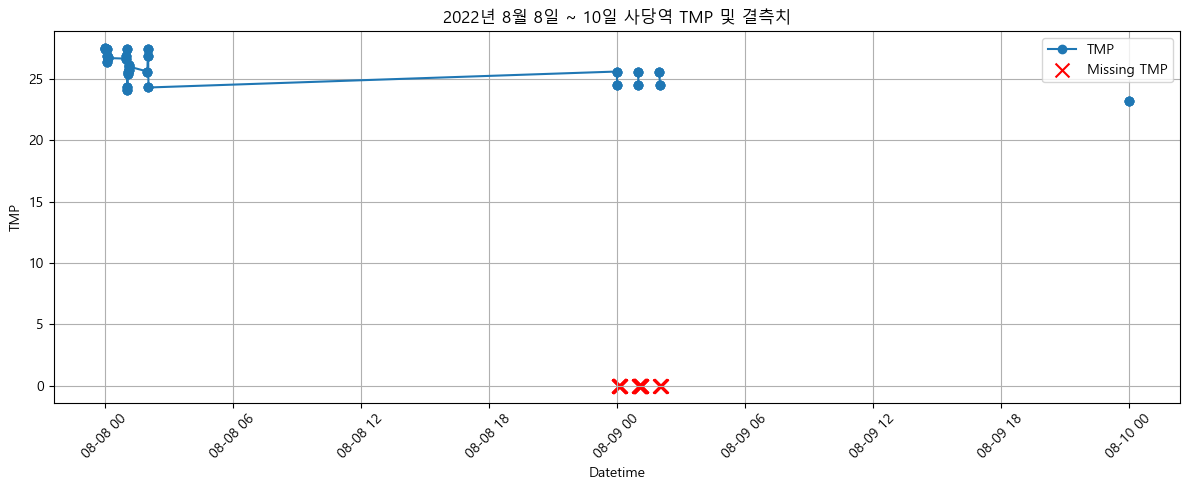

In [195]:
import matplotlib.pyplot as plt

# ÎÇ†Ïßú Î≤îÏúÑÏôÄ Ïó≠ ÌïÑÌÑ∞ÎßÅ
mask = (
    (df_tmp_cleaned['name'] == 'ÏÇ¨Îãπ') &
    (df_tmp_cleaned['datetime'] >= '2022-08-08') &
    (df_tmp_cleaned['datetime'] <= '2022-08-10')
)
sadang_period = df_tmp_cleaned.loc[mask].copy()

# Í≤∞Ï∏°Ïπò Ïó¨Î∂Ä Ïª¨Îüº Ï∂îÍ∞Ä
sadang_period['TMP_isna'] = sadang_period['TMP'].isna()

# ÏãúÍ∞ÑÏàú Ï†ïÎ†¨
sadang_period = sadang_period.sort_values(by='datetime')

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12,5))
plt.plot(sadang_period['datetime'], sadang_period['TMP'], marker='o', label='TMP')

# Í≤∞Ï∏°ÏπòÎäî y=0Ïóê Îπ®Í∞ÑÏÉâ X ÌëúÏãú
plt.scatter(
    sadang_period.loc[sadang_period['TMP_isna'], 'datetime'],
    [0]*sadang_period['TMP_isna'].sum(),
    color='red',
    marker='x',
    s=100,
    label='Missing TMP'
)

plt.title('2022ÎÖÑ 8Ïõî 8Ïùº ~ 10Ïùº ÏÇ¨ÎãπÏó≠ TMP Î∞è Í≤∞Ï∏°Ïπò')
plt.xlabel('Datetime')
plt.ylabel('TMP')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [196]:
mask = (
    (df_tmp_cleaned['name'] == 'ÏÇ¨Îãπ') &
    (df_tmp_cleaned['datetime'] >= '2022-08-08') &
    (df_tmp_cleaned['datetime'] <= '2022-08-10')
)
sadang_period = df_tmp_cleaned.loc[mask].copy()
sadang_period = sadang_period.sort_values(by='datetime')

In [197]:
for _, row in sadang_period.iterrows():
    dt_str = row['datetime'].strftime('%Y-%m-%d %H:%M')
    tmp_val = row['TMP']
    if pd.isna(tmp_val):
        tmp_val = 'Í≤∞Ï∏°'
    print(f"{dt_str} : TMP = {tmp_val}")

2022-08-08 00:00 : TMP = 27.5
2022-08-08 00:00 : TMP = 27.5
2022-08-08 00:00 : TMP = 27.5
2022-08-08 00:00 : TMP = 27.5
2022-08-08 00:01 : TMP = 27.4
2022-08-08 00:01 : TMP = 27.4
2022-08-08 00:01 : TMP = 27.4
2022-08-08 00:01 : TMP = 27.4
2022-08-08 00:05 : TMP = 27.4
2022-08-08 00:05 : TMP = 27.4
2022-08-08 00:05 : TMP = 27.4
2022-08-08 00:05 : TMP = 27.4
2022-08-08 00:06 : TMP = 26.9
2022-08-08 00:06 : TMP = 26.9
2022-08-08 00:06 : TMP = 26.9
2022-08-08 00:06 : TMP = 26.9
2022-08-08 00:07 : TMP = 26.4
2022-08-08 00:07 : TMP = 26.4
2022-08-08 00:07 : TMP = 26.4
2022-08-08 00:07 : TMP = 26.4
2022-08-08 00:08 : TMP = 26.8
2022-08-08 00:08 : TMP = 26.8
2022-08-08 00:08 : TMP = 26.8
2022-08-08 00:08 : TMP = 26.8
2022-08-08 00:09 : TMP = 26.7
2022-08-08 00:09 : TMP = 26.7
2022-08-08 00:09 : TMP = 26.7
2022-08-08 00:09 : TMP = 26.7
2022-08-08 01:00 : TMP = 26.65
2022-08-08 01:00 : TMP = 26.65
2022-08-08 01:00 : TMP = 26.65
2022-08-08 01:00 : TMP = 26.65
2022-08-08 01:01 : TMP = 26.9
2022-0

In [208]:
target_name = 'ÏÇ¨Îãπ'
target_direction = 'ÏÉÅÏÑ†'  # 'ÏÉÅÏÑ†', 'ÌïòÏÑ†', 'ÎÇ¥ÏÑ†', 'Ïô∏ÏÑ†' Ï§ë ÌïòÎÇò
target_year = 2022
target_month = 8
target_day = 8
target_hour = 10

mask = (
    (df_tmp_cleaned['name'] == target_name) &
    (df_tmp_cleaned['direction'] == target_direction) &
    (df_tmp_cleaned['year'] == target_year) &
    (df_tmp_cleaned['month'] == target_month) &
    (df_tmp_cleaned['day'] == target_day) &
    (df_tmp_cleaned['hour'] == target_hour)
)

selected_rows = df_tmp_cleaned.loc[mask]

print(f"{target_year}-{target_month}-{target_day} {target_hour}Ïãú {target_name}Ïó≠ {target_direction} Îç∞Ïù¥ÌÑ∞")
display(selected_rows)

2022-8-8 10Ïãú ÏÇ¨ÎãπÏó≠ ÏÉÅÏÑ† Îç∞Ïù¥ÌÑ∞


Empty DataFrame
Columns: [datetime, tm, line, station_number, name, direction, stn, TMP, wd, WSD, rn_day, PCP, REH, si, ta_chi, congestion, year, month, day, hour, date]
Index: []

[0 rows x 21 columns]

In [201]:
import pandas as pd

# 1. ÏÇ¨ÎãπÏó≠ÏóêÏÑú TMP Í≤∞Ï∏°Ïπò ÌïÑÌÑ∞
missing_sadang = df_tmp_cleaned[
    (df_tmp_cleaned['name'] == 'ÏÇ¨Îãπ') &
    (df_tmp_cleaned['TMP'].isna())
]

# 2. ÎÇ†Ïßú-ÏãúÍ∞ÑÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò ÏßëÍ≥Ñ
missing_count = missing_sadang.groupby('datetime').size().reset_index(name='missing_count')

# 3. Ï†ïÎ†¨Ìï¥ÏÑú Ï∂úÎ†•
missing_count = missing_count.sort_values('datetime')

print("ÏÇ¨ÎãπÏó≠ TMP Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÎÇ†Ïßú/ÏãúÍ∞ÑÎ≥Ñ Í∞úÏàò:")
for _, row in missing_count.iterrows():
    print(f"{row['datetime']} : {row['missing_count']}Í±¥")


ÏÇ¨ÎãπÏó≠ TMP Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÎÇ†Ïßú/ÏãúÍ∞ÑÎ≥Ñ Í∞úÏàò:
2022-06-30 01:02:00 : 4Í±¥
2022-06-30 01:03:00 : 4Í±¥
2022-06-30 01:04:00 : 4Í±¥
2022-06-30 02:01:00 : 4Í±¥
2022-06-30 02:02:00 : 4Í±¥
2022-06-30 02:03:00 : 4Í±¥
2022-08-09 00:05:00 : 4Í±¥
2022-08-09 00:06:00 : 4Í±¥
2022-08-09 00:07:00 : 4Í±¥
2022-08-09 00:08:00 : 4Í±¥
2022-08-09 00:09:00 : 4Í±¥
2022-08-09 01:02:00 : 4Í±¥
2022-08-09 01:03:00 : 4Í±¥
2022-08-09 01:04:00 : 4Í±¥
2022-08-09 01:05:00 : 4Í±¥
2022-08-09 01:06:00 : 4Í±¥
2022-08-09 01:07:00 : 4Í±¥
2022-08-09 01:08:00 : 4Í±¥
2022-08-09 01:09:00 : 4Í±¥
2022-08-09 02:02:00 : 4Í±¥
2022-08-09 02:03:00 : 4Í±¥
2022-08-10 00:05:00 : 4Í±¥
2022-08-10 00:06:00 : 4Í±¥
2022-08-10 00:07:00 : 4Í±¥
2022-08-10 00:08:00 : 4Í±¥
2022-08-10 00:09:00 : 4Í±¥
2022-08-10 01:02:00 : 4Í±¥
2022-08-10 01:03:00 : 4Í±¥
2022-08-10 01:04:00 : 4Í±¥
2022-08-10 01:05:00 : 4Í±¥
2022-08-10 01:06:00 : 4Í±¥
2022-08-10 01:07:00 : 4Í±¥
2022-08-10 01:08:00 : 4Í±¥
2022-08-10 01:09:00 : 4Í±¥
2022-08-10 02:02:00 : 4

In [204]:
sadang_df = df_tmp_cleaned[df_tmp_cleaned['name'] == 'ÏÇ¨Îãπ'].copy()
sadang_df['date'] = sadang_df['datetime'].dt.date


In [205]:
agg = sadang_df.groupby('date').agg(
    missing_count = ('TMP', lambda x: x.isna().sum()),
    valid_count = ('TMP', lambda x: ((x.notna()) & (x != -99.0)).sum())
).reset_index()


In [206]:
dates_no_valid_tmp = agg[(agg['missing_count'] > 0) & (agg['valid_count'] == 0)]['date'].tolist()
print("Í≤∞Ï∏°Ïπò Ìè¨Ìï®, Ïú†Ìö®Í∞í ÏóÜÎäî ÎÇ†Ïßú:")
print(dates_no_valid_tmp)


Í≤∞Ï∏°Ïπò Ìè¨Ìï®, Ïú†Ìö®Í∞í ÏóÜÎäî ÎÇ†Ïßú:
[]


In [210]:
target_name = 'ÏÇ¨Îãπ'
target_direction = 'ÏÉÅÏÑ†'  # 'ÏÉÅÏÑ†', 'ÌïòÏÑ†', 'ÎÇ¥ÏÑ†', 'Ïô∏ÏÑ†' Ï§ë ÌïòÎÇò
target_year = 2022
target_month = 8
target_day = 8
target_hour = 10

mask = (
    (df_tmp_cleaned['name'] == target_name) &
    (df_tmp_cleaned['direction'] == target_direction) &
    (df_tmp_cleaned['year'] == target_year) &
    (df_tmp_cleaned['month'] == target_month) &
    (df_tmp_cleaned['day'] == target_day) &
    (df_tmp_cleaned['hour'] == target_hour)
)

selected_rows = df_tmp_cleaned.loc[mask]

print(f"{target_year}-{target_month}-{target_day} {target_hour}Ïãú {target_name}Ïó≠ {target_direction} Îç∞Ïù¥ÌÑ∞")
display(selected_rows)


2022-8-8 10Ïãú ÏÇ¨ÎãπÏó≠ ÏÉÅÏÑ† Îç∞Ïù¥ÌÑ∞


Empty DataFrame
Columns: [datetime, tm, line, station_number, name, direction, stn, TMP, wd, WSD, rn_day, PCP, REH, si, ta_chi, congestion, year, month, day, hour, date]
Index: []

[0 rows x 21 columns]